# Intelligent Agents: Reflex-Based Agents for the Vacuum-cleaner World


## Instructions

Total Points: Undergrads 100 / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a PDF file. 

## Introduction

In this assignment you will implement a simulator environment for an automatic vacuum cleaner robot, a set of different reflex-based agent programs, and perform a comparison study for cleaning a single room. Focus on the __cleaning phase__ which starts when the robot is activated and ends when the last dirty square in the room has been cleaned. Someone else will take care of the agent program needed to navigate back to the charging station after the room is clean.

## PEAS description of the cleaning phase

__Performance Measure:__ Each action costs 1 energy unit. The performance is measured as the sum of the energy units used to clean the whole room.

__Environment:__ A room with $n \times n$ squares where $n = 5$. Dirt is randomly placed on each square with probability $p = 0.2$. For simplicity, you can assume that the agent knows the size and the layout of the room (i.e., it knows $n$). To start, the agent is placed on a random square.

__Actuators:__ The agent can clean the current square (action `suck`) or move to an adjacent square by going `north`, `east`, `south`, or `west`.

__Sensors:__ Four bumper sensors, one for north, east, south, and west; a dirt sensor reporting dirt in the current square.  


## The agent program for a simple randomized agent

The agent program is a function that gets sensor information (the current percepts) as the arguments. The arguments are:

* A dictionary with boolean entries for the for bumper sensors `north`, `east`, `west`, `south`. E.g., if the agent is on the north-west corner, `bumpers` will be `{"north" : True, "east" : False, "south" : False, "west" : True}`.
* The dirt sensor produces a boolean.

The agent returns the chosen action as a string.

Here is an example implementation for the agent program of a simple randomized agent:  

In [1]:
import numpy as np

actions = ["north", "east", "west", "south", "suck"]

def simple_randomized_agent(bumpers, dirty):
    return np.random.choice(actions)

In [2]:
# define percepts (current location is NW corner and it is dirty)
bumpers = {"north" : True, "east" : False, "south" : False, "west" : True}
dirty = True

# call agent program function with percepts and it returns an action
simple_randomized_agent(bumpers, dirty)

'suck'

__Note:__ This is not a rational intelligent agent. It ignores its sensors and may bump into a wall repeatedly or not clean a dirty square. You will be asked to implement rational agents below.

## Simple environment example

We implement a simple simulation environment that supplies the agent with its percepts.
The simple environment is infinite in size (bumpers are always `False`) and every square is always dirty, even if the agent cleans it. The environment function returns a performance measure which is here the number of cleaned squares (since the room is infinite and all squares are constantly dirty, the agent can never clean the whole room as required in the PEAS description above). The energy budget of the agent is specified as `max_steps`. 

In [3]:
def simple_environment(agent, max_steps, verbose = True):
    num_cleaned = 0
    
    for i in range(max_steps):
        dirty = True
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}

        action = agent(bumpers, dirty)
        if (verbose): print("step", i , "- action:", action) 
        
        if (action == "suck"): 
            num_cleaned = num_cleaned + 1
        
    return num_cleaned
        


Do one simulation run with a simple randomized agent that has enough energy for 20 steps.

In [4]:
simple_environment(simple_randomized_agent, max_steps = 20)

step 0 - action: south
step 1 - action: east
step 2 - action: north
step 3 - action: east
step 4 - action: east
step 5 - action: south
step 6 - action: north
step 7 - action: suck
step 8 - action: west
step 9 - action: suck
step 10 - action: east
step 11 - action: east
step 12 - action: north
step 13 - action: suck
step 14 - action: east
step 15 - action: west
step 16 - action: east
step 17 - action: east
step 18 - action: west
step 19 - action: south


3

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision. 
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement inteligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formated professionally. 
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.


## Task 1: Implement a simulation environment [20 Points]

The simple environment above is not very realistic. Your environment simulator needs to follow the PEAS description from above. It needs to:

* Initialize the environment by storing the state of each square (clean/dirty) and making some dirty. ([Help with random numbers and arrays in Python](https://github.com/mhahsler/CS7320-AI/blob/master/Python_Code_Examples/random_numbers_and_arrays.ipynb))
* Keep track of the agent's position.
* Call the agent function repeatedly and provide the agent function with the sensor inputs.  
* React to the agent's actions. E.g, by removing dirt from a square or moving the agent around unless there is a wall in the way.
* Keep track of the performance measure. That is, track the agent's actions until all dirty squares are clean and count the number of actions it takes the agent to complete the task.

The easiest implementation for the environment is to hold an 2-dimensional array to represent if squares are clean or dirty and to call the agent function in a loop until all squares are clean or a predefined number of steps have been reached (i.e., the robot runs out of energy).

The simulation environment should be a function like the `simple_environment()` and needs to work with the simple randomized agent program from above. Use the same environmnt for all your agent implementations in the tasks below.

*Note on debugging:* Debugging is difficult. Make sure your environment prints enough information when you use `verbose = True`. Also, implementing a function that the environment can use to displays the room with dirt and the current position of the robot at every step is very useful.  

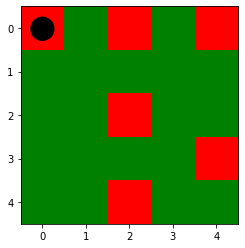

In [5]:
# Your code and description goes here
#Display environment on X and Y with square area to show clean or dirty.
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
''''display room and position of robot using
    1. Environment with dirt location(2 dimentional array)
    2. postion of robot(int)
    3. font size for size of robot(int)'''''
def show_environment(room, position, fontsize = 24):  
    color_map = colors.ListedColormap(['green', 'red'])
    room = np.copy(room)    
    room = room.astype(np.int64)
    fig, ax = plt.subplots()
    ax.imshow(room, cmap = color_map, norm = colors.BoundaryNorm(list(range(color_map.N+1)), color_map.N))
    plt.text(position[1], position[0], u"\u2B24", fontsize = fontsize,
                 horizontalalignment = 'center', verticalalignment = 'center')
    
    plt.show()

#True:Dirty Square
#False: clean square

room = [[True,False, True, False,True], 
    [False, False, False,False,False],
    [False, False, True,False,False],
    [False,False,False,False,True],
    [False,False,True,False,False]]
position = [0,0]

show_environment(room, position)

#Define Vaccum Environment
def vacuum_environment (agent, n = 5, p = .2, maxsteps = 10000, verbose = True):
    room = np.random.choice(a=[True, False], size= (n,n), p=[p,1-p])
    if (verbose): print("Environment with Dirt Location:\n", room)
    to_clean = np.sum(room)
    if (verbose): print("Total Dirty Squares:", to_clean)
    position = [np.random.randint(n),np.random.randint(n)]  #Random position for the robot
    num_clean = 0 #Initial dirty square 
    cost = 0 #Performance Measure
    i = 1
    if (verbose): print("\nInitialize simulation")

    while cost < maxsteps and num_clean < to_clean :

        if verbose:

            show_environment(room, position)

        bumpers = {
# Percepts
                   "north": position[0] == 0,

                   "south": position[0] == n-1,

                   "west" : position[1] == 0,

                   "east" : position[1] == n-1

                    }

        dirty = room[position[0]][position[1]]

        if (verbose): print("-----")

        if (verbose): 

            print("step:", i) 

            i = i + 1

        if (verbose): print("Robot's Current Position", position)

        if (verbose): print("Sensor/Bumper Information:", bumpers)

        if (verbose): print("Is it Dirty?:", dirty)
        

        action = agent(bumpers,dirty) # Initialize agent object with current percept

        if (verbose): 

            print("Action", action)

        cost += 1 #cost calculation
        #using conditional statement to locate wall/bumper
        if action == "north" :

            position[0] = position[0] - 1

            if position[0] == -1:

                position[0] = 0

            

        elif action == "south" :

            position[0] = position[0] + 1

            if position[0] == n:

                position[0] = n - 1

                

        elif action == "west" :

            position[1] = position[1] - 1

            if position[1] == -1:

                position[1] = 0

                

        elif action == "east" :

            position[1] = position[1] + 1

            if position[1] == n:

                position[1] = n - 1

        elif action == "suck" :

            if dirty: 

                room[position[0]][position[1]] = False

                num_clean+= 1 # Total cleaned square             

    return [num_clean, cost]        


Environment with Dirt Location:
 [[False False False False False]
 [False False False  True False]
 [False False False  True False]
 [False  True False False False]
 [False False False False False]]
Total Dirty Squares: 3

Initialize simulation


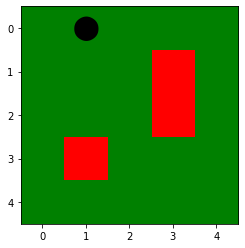

-----
step: 1
Robot's Current Position [0, 1]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action west


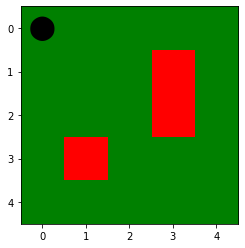

-----
step: 2
Robot's Current Position [0, 0]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action east


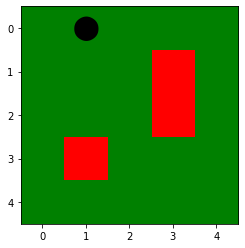

-----
step: 3
Robot's Current Position [0, 1]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action north


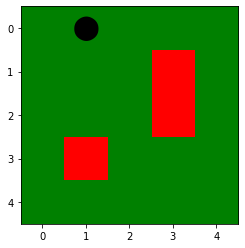

-----
step: 4
Robot's Current Position [0, 1]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action east


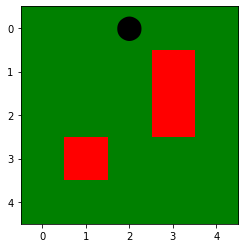

-----
step: 5
Robot's Current Position [0, 2]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action north


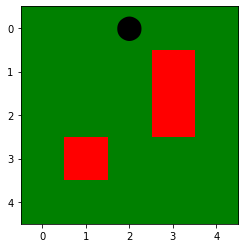

-----
step: 6
Robot's Current Position [0, 2]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action west


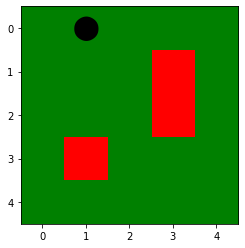

-----
step: 7
Robot's Current Position [0, 1]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action west


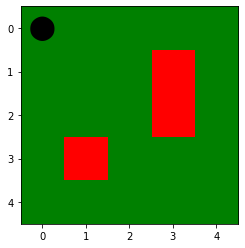

-----
step: 8
Robot's Current Position [0, 0]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action south


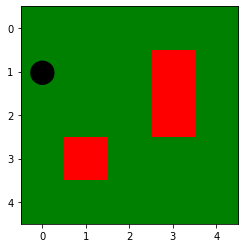

-----
step: 9
Robot's Current Position [1, 0]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action north


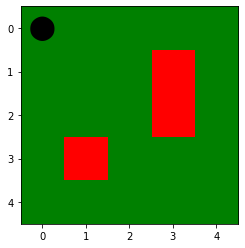

-----
step: 10
Robot's Current Position [0, 0]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action west


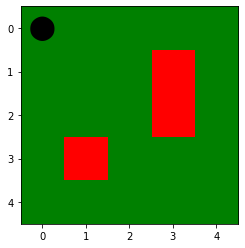

-----
step: 11
Robot's Current Position [0, 0]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action north


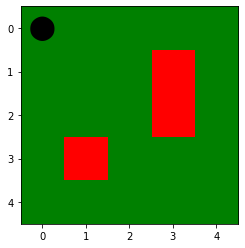

-----
step: 12
Robot's Current Position [0, 0]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action west


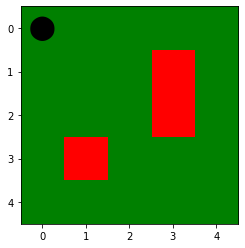

-----
step: 13
Robot's Current Position [0, 0]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action south


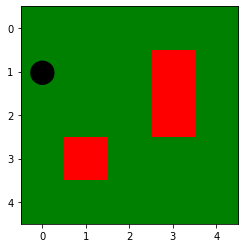

-----
step: 14
Robot's Current Position [1, 0]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action west


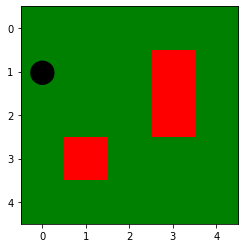

-----
step: 15
Robot's Current Position [1, 0]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action east


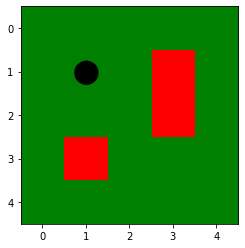

-----
step: 16
Robot's Current Position [1, 1]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action suck


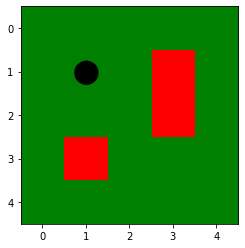

-----
step: 17
Robot's Current Position [1, 1]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action north


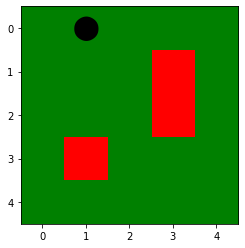

-----
step: 18
Robot's Current Position [0, 1]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action east


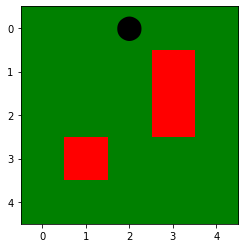

-----
step: 19
Robot's Current Position [0, 2]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action north


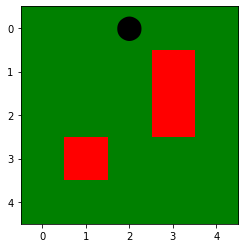

-----
step: 20
Robot's Current Position [0, 2]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action east


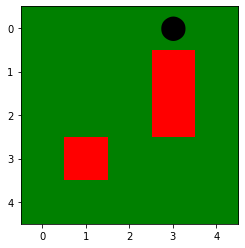

-----
step: 21
Robot's Current Position [0, 3]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action south


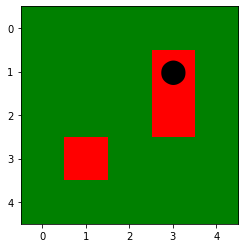

-----
step: 22
Robot's Current Position [1, 3]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: True
Action suck


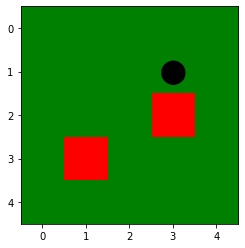

-----
step: 23
Robot's Current Position [1, 3]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action north


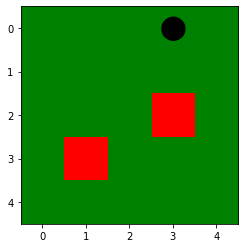

-----
step: 24
Robot's Current Position [0, 3]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action south


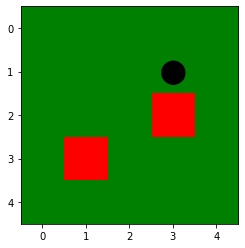

-----
step: 25
Robot's Current Position [1, 3]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action west


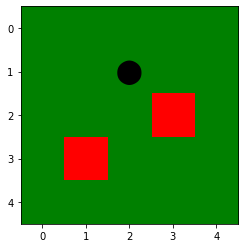

-----
step: 26
Robot's Current Position [1, 2]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action east


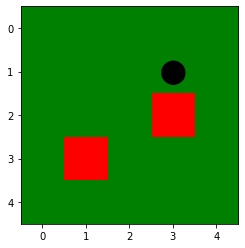

-----
step: 27
Robot's Current Position [1, 3]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action east


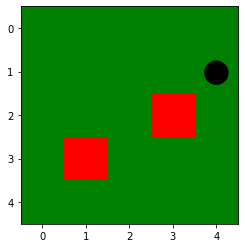

-----
step: 28
Robot's Current Position [1, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action east


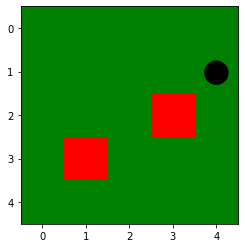

-----
step: 29
Robot's Current Position [1, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action east


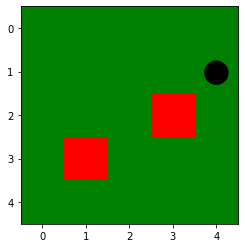

-----
step: 30
Robot's Current Position [1, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action suck


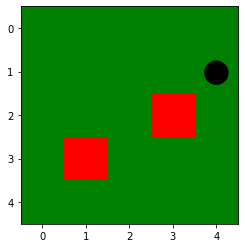

-----
step: 31
Robot's Current Position [1, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action south


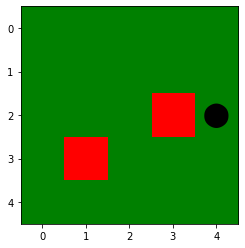

-----
step: 32
Robot's Current Position [2, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action west


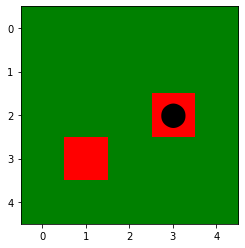

-----
step: 33
Robot's Current Position [2, 3]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: True
Action west


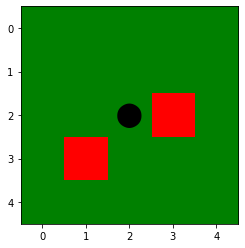

-----
step: 34
Robot's Current Position [2, 2]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action suck


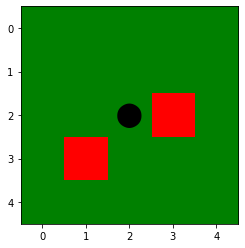

-----
step: 35
Robot's Current Position [2, 2]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action south


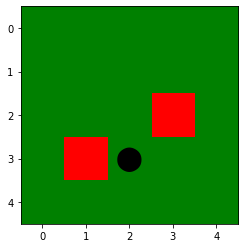

-----
step: 36
Robot's Current Position [3, 2]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action west


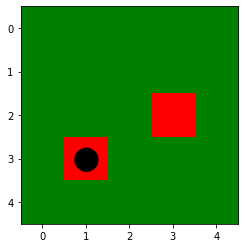

-----
step: 37
Robot's Current Position [3, 1]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: True
Action north


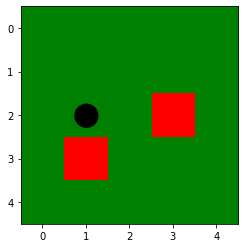

-----
step: 38
Robot's Current Position [2, 1]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action north


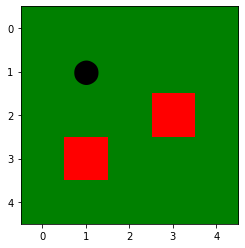

-----
step: 39
Robot's Current Position [1, 1]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action suck


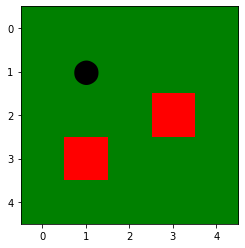

-----
step: 40
Robot's Current Position [1, 1]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action suck


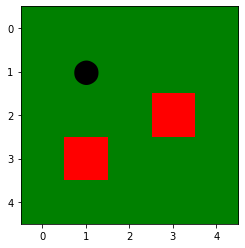

-----
step: 41
Robot's Current Position [1, 1]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action south


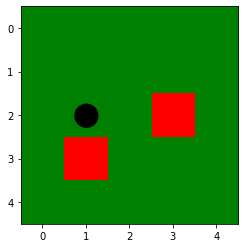

-----
step: 42
Robot's Current Position [2, 1]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action suck


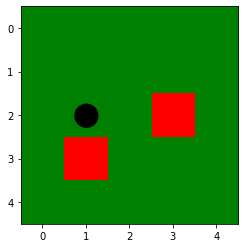

-----
step: 43
Robot's Current Position [2, 1]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action south


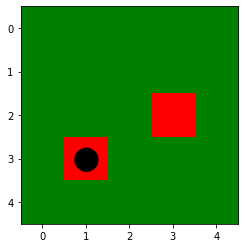

-----
step: 44
Robot's Current Position [3, 1]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: True
Action north


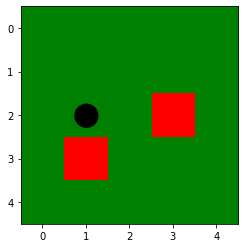

-----
step: 45
Robot's Current Position [2, 1]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action north


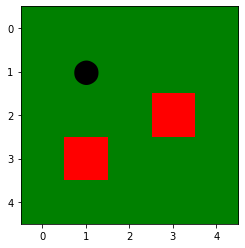

-----
step: 46
Robot's Current Position [1, 1]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action suck


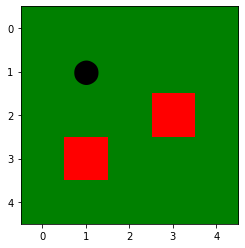

-----
step: 47
Robot's Current Position [1, 1]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action south


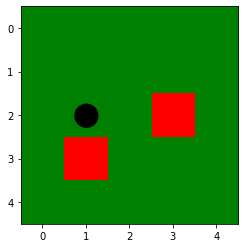

-----
step: 48
Robot's Current Position [2, 1]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action south


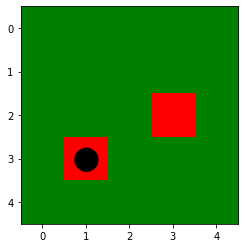

-----
step: 49
Robot's Current Position [3, 1]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: True
Action south


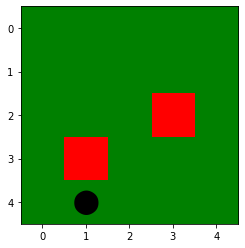

-----
step: 50
Robot's Current Position [4, 1]
Sensor/Bumper Information: {'north': False, 'south': True, 'west': False, 'east': False}
Is it Dirty?: False
Action east


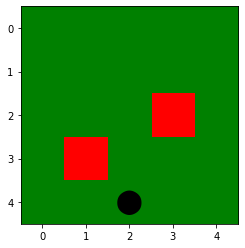

-----
step: 51
Robot's Current Position [4, 2]
Sensor/Bumper Information: {'north': False, 'south': True, 'west': False, 'east': False}
Is it Dirty?: False
Action suck


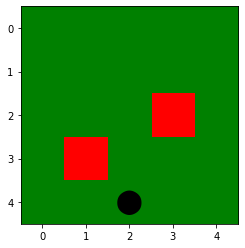

-----
step: 52
Robot's Current Position [4, 2]
Sensor/Bumper Information: {'north': False, 'south': True, 'west': False, 'east': False}
Is it Dirty?: False
Action suck


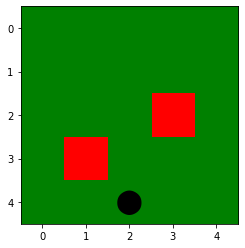

-----
step: 53
Robot's Current Position [4, 2]
Sensor/Bumper Information: {'north': False, 'south': True, 'west': False, 'east': False}
Is it Dirty?: False
Action east


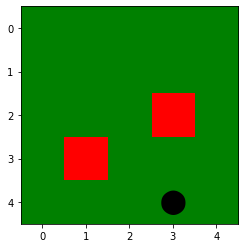

-----
step: 54
Robot's Current Position [4, 3]
Sensor/Bumper Information: {'north': False, 'south': True, 'west': False, 'east': False}
Is it Dirty?: False
Action south


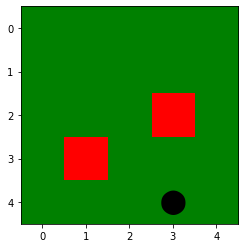

-----
step: 55
Robot's Current Position [4, 3]
Sensor/Bumper Information: {'north': False, 'south': True, 'west': False, 'east': False}
Is it Dirty?: False
Action east


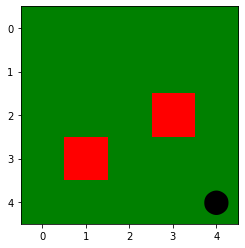

-----
step: 56
Robot's Current Position [4, 4]
Sensor/Bumper Information: {'north': False, 'south': True, 'west': False, 'east': True}
Is it Dirty?: False
Action west


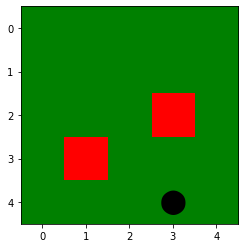

-----
step: 57
Robot's Current Position [4, 3]
Sensor/Bumper Information: {'north': False, 'south': True, 'west': False, 'east': False}
Is it Dirty?: False
Action north


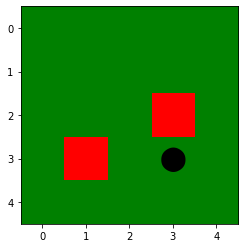

-----
step: 58
Robot's Current Position [3, 3]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action north


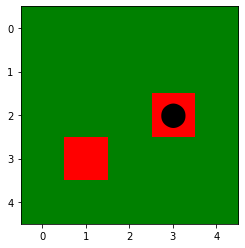

-----
step: 59
Robot's Current Position [2, 3]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: True
Action east


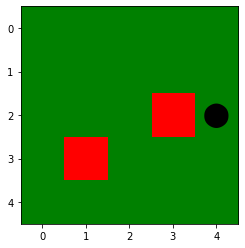

-----
step: 60
Robot's Current Position [2, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action north


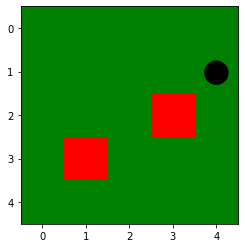

-----
step: 61
Robot's Current Position [1, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action suck


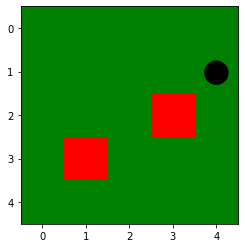

-----
step: 62
Robot's Current Position [1, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action north


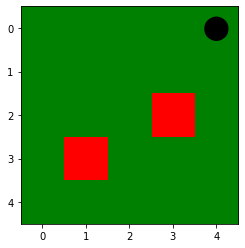

-----
step: 63
Robot's Current Position [0, 4]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action south


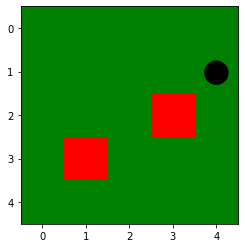

-----
step: 64
Robot's Current Position [1, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action suck


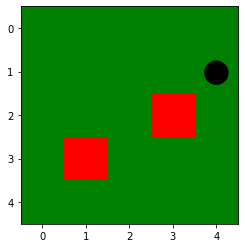

-----
step: 65
Robot's Current Position [1, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action west


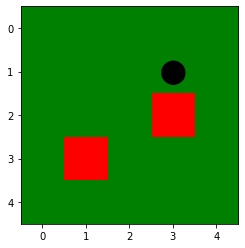

-----
step: 66
Robot's Current Position [1, 3]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action east


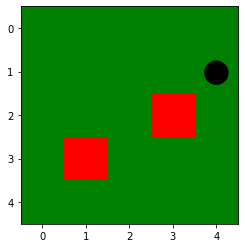

-----
step: 67
Robot's Current Position [1, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action west


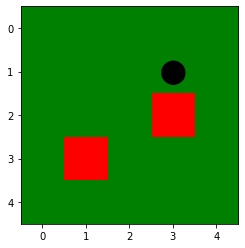

-----
step: 68
Robot's Current Position [1, 3]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action west


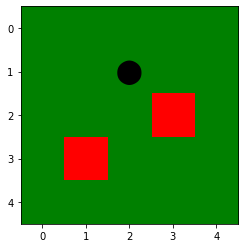

-----
step: 69
Robot's Current Position [1, 2]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action west


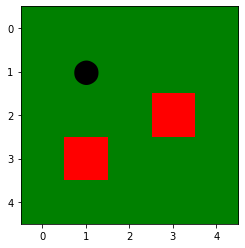

-----
step: 70
Robot's Current Position [1, 1]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action west


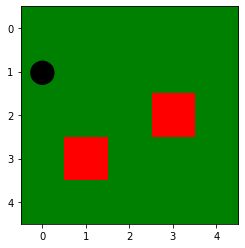

-----
step: 71
Robot's Current Position [1, 0]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action east


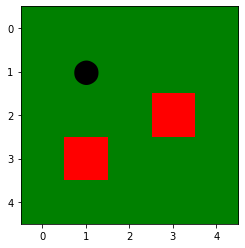

-----
step: 72
Robot's Current Position [1, 1]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action south


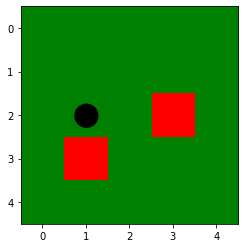

-----
step: 73
Robot's Current Position [2, 1]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action suck


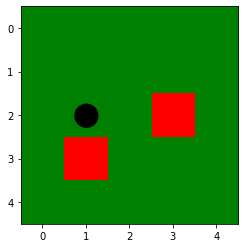

-----
step: 74
Robot's Current Position [2, 1]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action suck


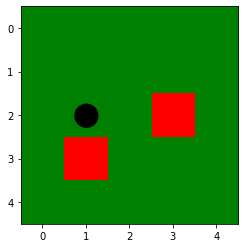

-----
step: 75
Robot's Current Position [2, 1]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action suck


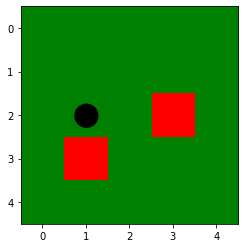

-----
step: 76
Robot's Current Position [2, 1]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action west


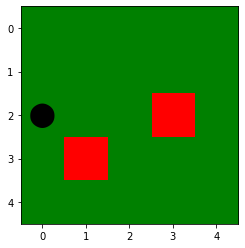

-----
step: 77
Robot's Current Position [2, 0]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action south


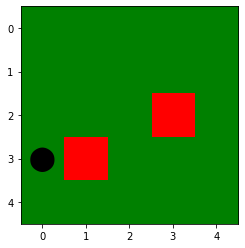

-----
step: 78
Robot's Current Position [3, 0]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action east


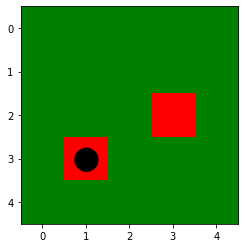

-----
step: 79
Robot's Current Position [3, 1]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: True
Action west


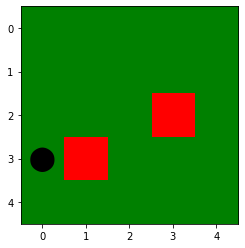

-----
step: 80
Robot's Current Position [3, 0]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action suck


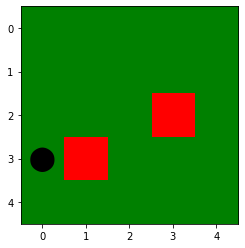

-----
step: 81
Robot's Current Position [3, 0]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action suck


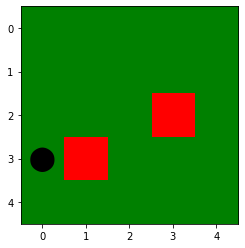

-----
step: 82
Robot's Current Position [3, 0]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action suck


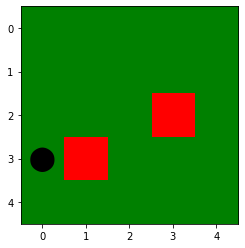

-----
step: 83
Robot's Current Position [3, 0]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action north


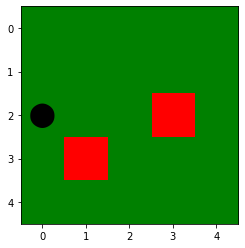

-----
step: 84
Robot's Current Position [2, 0]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action north


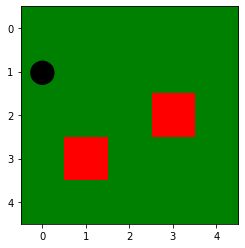

-----
step: 85
Robot's Current Position [1, 0]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action suck


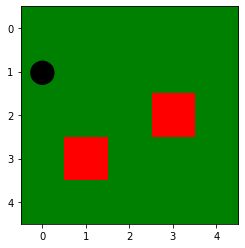

-----
step: 86
Robot's Current Position [1, 0]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action south


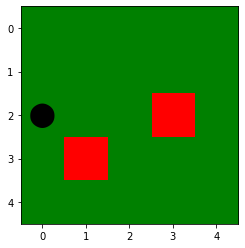

-----
step: 87
Robot's Current Position [2, 0]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action north


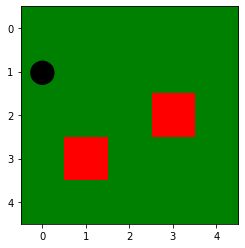

-----
step: 88
Robot's Current Position [1, 0]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action south


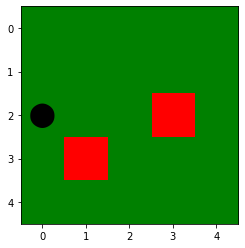

-----
step: 89
Robot's Current Position [2, 0]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action west


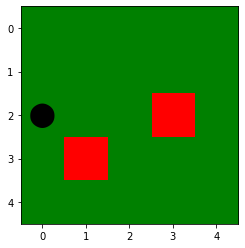

-----
step: 90
Robot's Current Position [2, 0]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action east


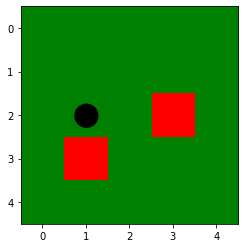

-----
step: 91
Robot's Current Position [2, 1]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action south


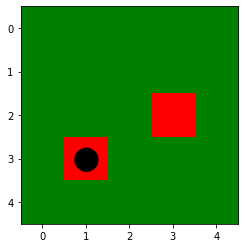

-----
step: 92
Robot's Current Position [3, 1]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: True
Action north


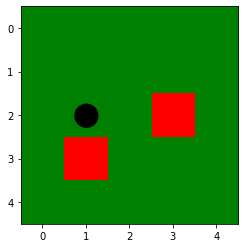

-----
step: 93
Robot's Current Position [2, 1]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action north


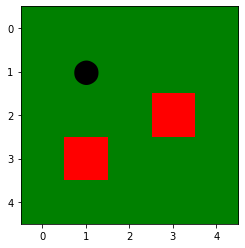

-----
step: 94
Robot's Current Position [1, 1]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action east


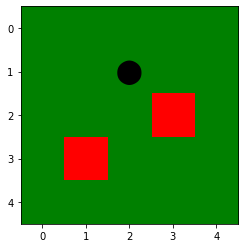

-----
step: 95
Robot's Current Position [1, 2]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action east


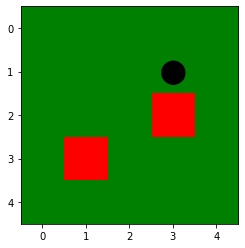

-----
step: 96
Robot's Current Position [1, 3]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action west


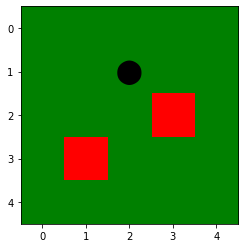

-----
step: 97
Robot's Current Position [1, 2]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action south


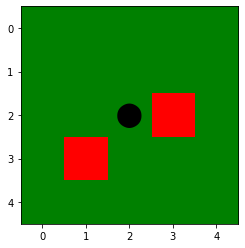

-----
step: 98
Robot's Current Position [2, 2]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action east


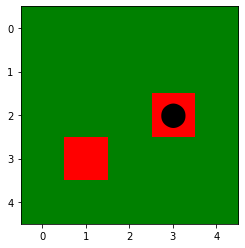

-----
step: 99
Robot's Current Position [2, 3]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: True
Action suck


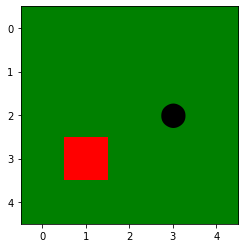

-----
step: 100
Robot's Current Position [2, 3]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action west


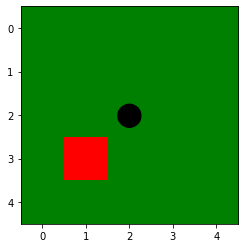

-----
step: 101
Robot's Current Position [2, 2]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action south


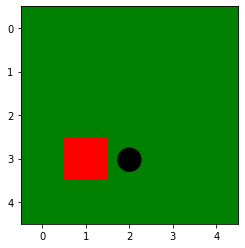

-----
step: 102
Robot's Current Position [3, 2]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action north


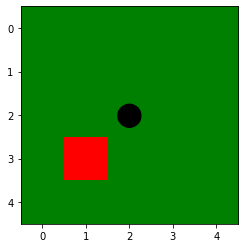

-----
step: 103
Robot's Current Position [2, 2]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action east


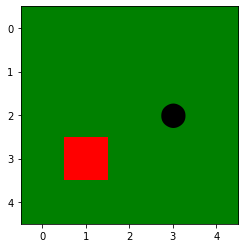

-----
step: 104
Robot's Current Position [2, 3]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action west


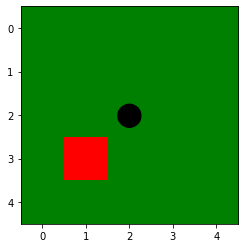

-----
step: 105
Robot's Current Position [2, 2]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action north


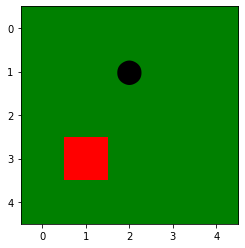

-----
step: 106
Robot's Current Position [1, 2]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action south


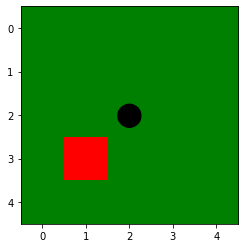

-----
step: 107
Robot's Current Position [2, 2]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action west


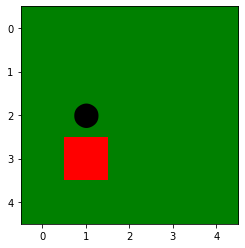

-----
step: 108
Robot's Current Position [2, 1]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action east


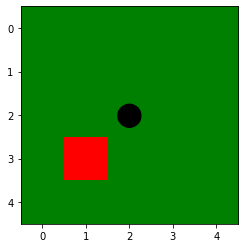

-----
step: 109
Robot's Current Position [2, 2]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action east


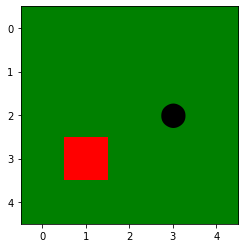

-----
step: 110
Robot's Current Position [2, 3]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action east


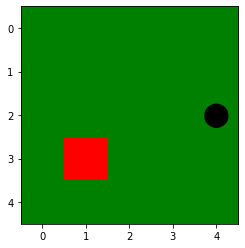

-----
step: 111
Robot's Current Position [2, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action north


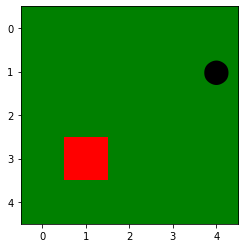

-----
step: 112
Robot's Current Position [1, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action north


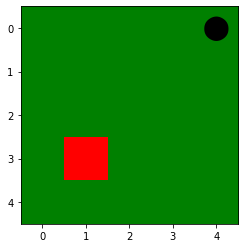

-----
step: 113
Robot's Current Position [0, 4]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action west


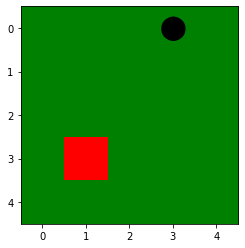

-----
step: 114
Robot's Current Position [0, 3]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action west


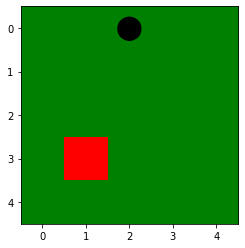

-----
step: 115
Robot's Current Position [0, 2]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action east


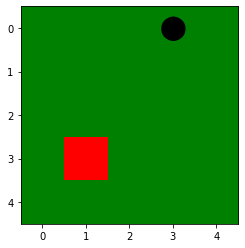

-----
step: 116
Robot's Current Position [0, 3]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action east


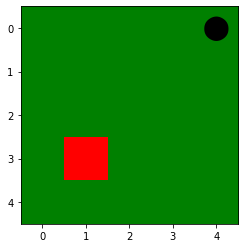

-----
step: 117
Robot's Current Position [0, 4]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action south


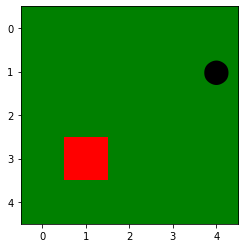

-----
step: 118
Robot's Current Position [1, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action south


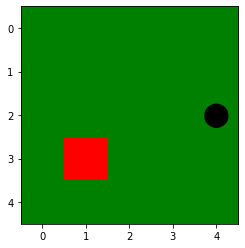

-----
step: 119
Robot's Current Position [2, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action west


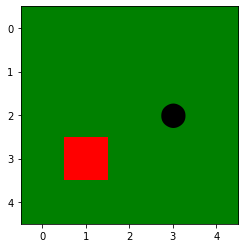

-----
step: 120
Robot's Current Position [2, 3]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action suck


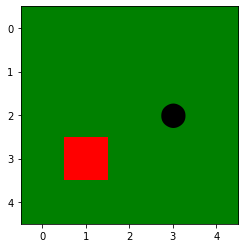

-----
step: 121
Robot's Current Position [2, 3]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action suck


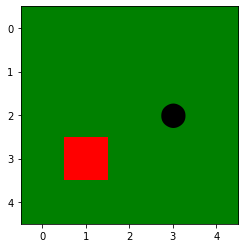

-----
step: 122
Robot's Current Position [2, 3]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action east


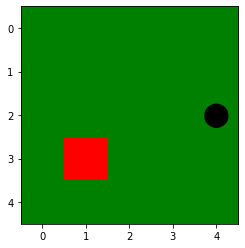

-----
step: 123
Robot's Current Position [2, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action south


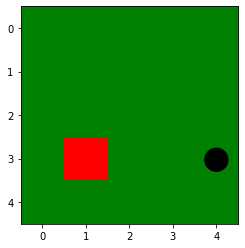

-----
step: 124
Robot's Current Position [3, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action south


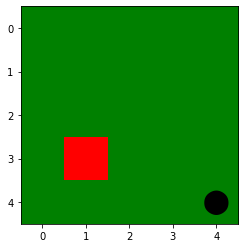

-----
step: 125
Robot's Current Position [4, 4]
Sensor/Bumper Information: {'north': False, 'south': True, 'west': False, 'east': True}
Is it Dirty?: False
Action east


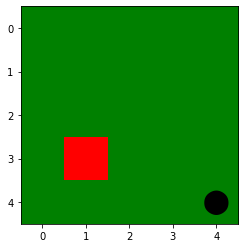

-----
step: 126
Robot's Current Position [4, 4]
Sensor/Bumper Information: {'north': False, 'south': True, 'west': False, 'east': True}
Is it Dirty?: False
Action suck


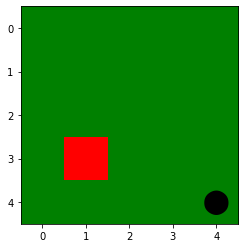

-----
step: 127
Robot's Current Position [4, 4]
Sensor/Bumper Information: {'north': False, 'south': True, 'west': False, 'east': True}
Is it Dirty?: False
Action east


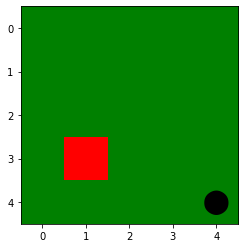

-----
step: 128
Robot's Current Position [4, 4]
Sensor/Bumper Information: {'north': False, 'south': True, 'west': False, 'east': True}
Is it Dirty?: False
Action south


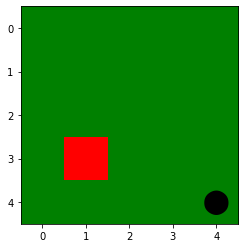

-----
step: 129
Robot's Current Position [4, 4]
Sensor/Bumper Information: {'north': False, 'south': True, 'west': False, 'east': True}
Is it Dirty?: False
Action west


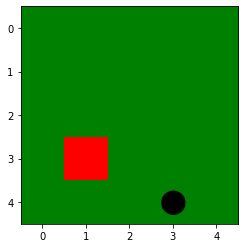

-----
step: 130
Robot's Current Position [4, 3]
Sensor/Bumper Information: {'north': False, 'south': True, 'west': False, 'east': False}
Is it Dirty?: False
Action east


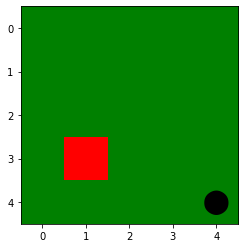

-----
step: 131
Robot's Current Position [4, 4]
Sensor/Bumper Information: {'north': False, 'south': True, 'west': False, 'east': True}
Is it Dirty?: False
Action east


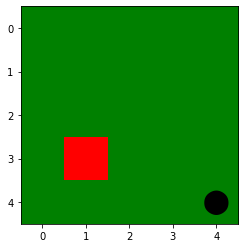

-----
step: 132
Robot's Current Position [4, 4]
Sensor/Bumper Information: {'north': False, 'south': True, 'west': False, 'east': True}
Is it Dirty?: False
Action west


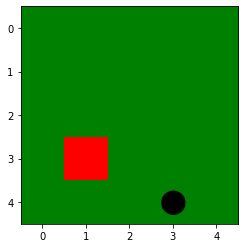

-----
step: 133
Robot's Current Position [4, 3]
Sensor/Bumper Information: {'north': False, 'south': True, 'west': False, 'east': False}
Is it Dirty?: False
Action suck


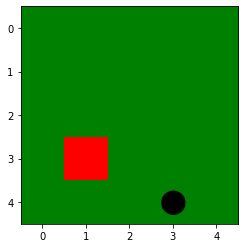

-----
step: 134
Robot's Current Position [4, 3]
Sensor/Bumper Information: {'north': False, 'south': True, 'west': False, 'east': False}
Is it Dirty?: False
Action east


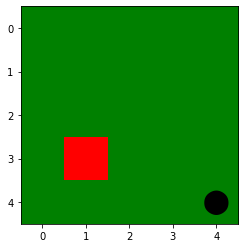

-----
step: 135
Robot's Current Position [4, 4]
Sensor/Bumper Information: {'north': False, 'south': True, 'west': False, 'east': True}
Is it Dirty?: False
Action west


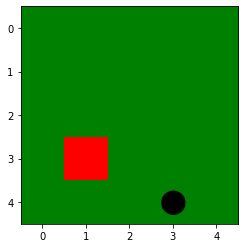

-----
step: 136
Robot's Current Position [4, 3]
Sensor/Bumper Information: {'north': False, 'south': True, 'west': False, 'east': False}
Is it Dirty?: False
Action south


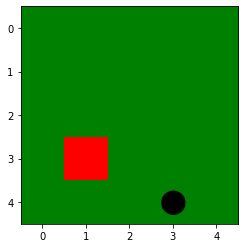

-----
step: 137
Robot's Current Position [4, 3]
Sensor/Bumper Information: {'north': False, 'south': True, 'west': False, 'east': False}
Is it Dirty?: False
Action east


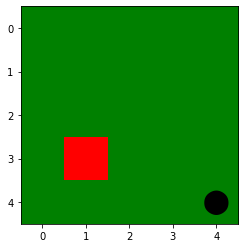

-----
step: 138
Robot's Current Position [4, 4]
Sensor/Bumper Information: {'north': False, 'south': True, 'west': False, 'east': True}
Is it Dirty?: False
Action north


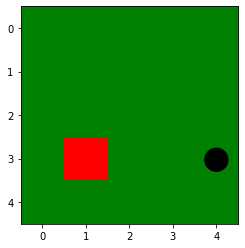

-----
step: 139
Robot's Current Position [3, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action west


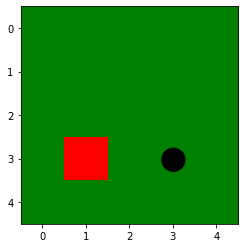

-----
step: 140
Robot's Current Position [3, 3]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action north


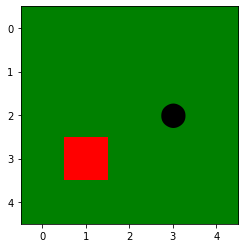

-----
step: 141
Robot's Current Position [2, 3]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action suck


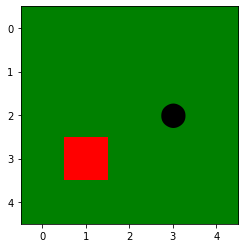

-----
step: 142
Robot's Current Position [2, 3]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action south


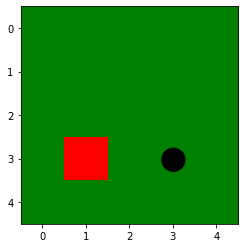

-----
step: 143
Robot's Current Position [3, 3]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action south


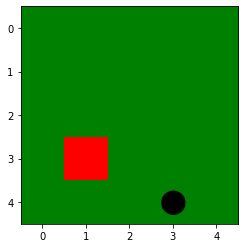

-----
step: 144
Robot's Current Position [4, 3]
Sensor/Bumper Information: {'north': False, 'south': True, 'west': False, 'east': False}
Is it Dirty?: False
Action north


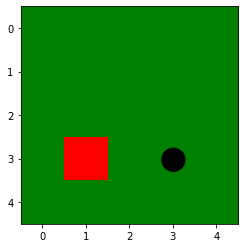

-----
step: 145
Robot's Current Position [3, 3]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action east


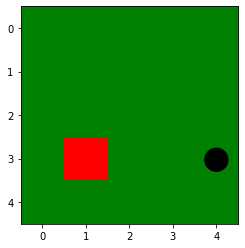

-----
step: 146
Robot's Current Position [3, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action south


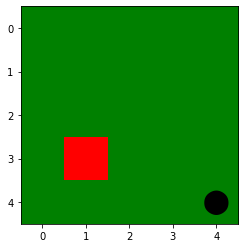

-----
step: 147
Robot's Current Position [4, 4]
Sensor/Bumper Information: {'north': False, 'south': True, 'west': False, 'east': True}
Is it Dirty?: False
Action north


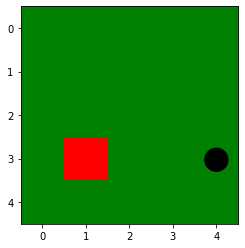

-----
step: 148
Robot's Current Position [3, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action south


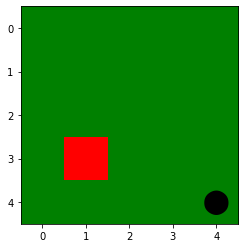

-----
step: 149
Robot's Current Position [4, 4]
Sensor/Bumper Information: {'north': False, 'south': True, 'west': False, 'east': True}
Is it Dirty?: False
Action south


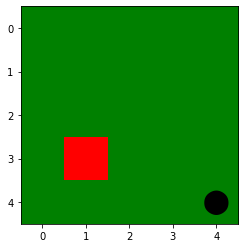

-----
step: 150
Robot's Current Position [4, 4]
Sensor/Bumper Information: {'north': False, 'south': True, 'west': False, 'east': True}
Is it Dirty?: False
Action suck


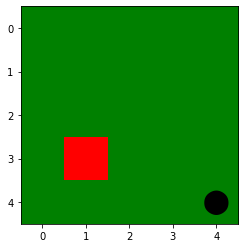

-----
step: 151
Robot's Current Position [4, 4]
Sensor/Bumper Information: {'north': False, 'south': True, 'west': False, 'east': True}
Is it Dirty?: False
Action east


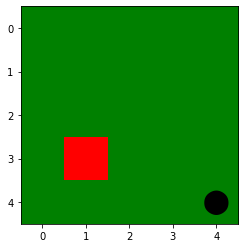

-----
step: 152
Robot's Current Position [4, 4]
Sensor/Bumper Information: {'north': False, 'south': True, 'west': False, 'east': True}
Is it Dirty?: False
Action north


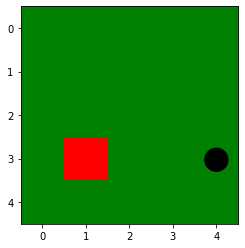

-----
step: 153
Robot's Current Position [3, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action suck


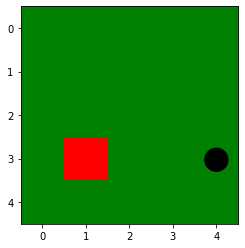

-----
step: 154
Robot's Current Position [3, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action south


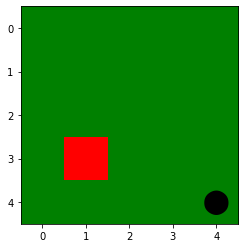

-----
step: 155
Robot's Current Position [4, 4]
Sensor/Bumper Information: {'north': False, 'south': True, 'west': False, 'east': True}
Is it Dirty?: False
Action north


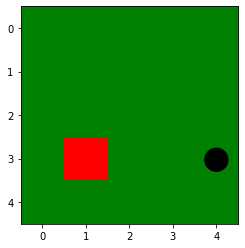

-----
step: 156
Robot's Current Position [3, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action south


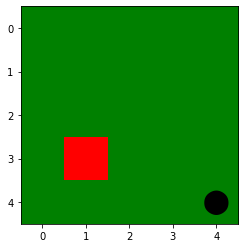

-----
step: 157
Robot's Current Position [4, 4]
Sensor/Bumper Information: {'north': False, 'south': True, 'west': False, 'east': True}
Is it Dirty?: False
Action south


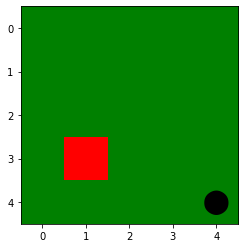

-----
step: 158
Robot's Current Position [4, 4]
Sensor/Bumper Information: {'north': False, 'south': True, 'west': False, 'east': True}
Is it Dirty?: False
Action suck


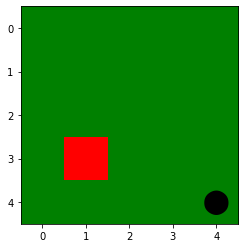

-----
step: 159
Robot's Current Position [4, 4]
Sensor/Bumper Information: {'north': False, 'south': True, 'west': False, 'east': True}
Is it Dirty?: False
Action west


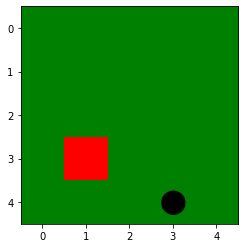

-----
step: 160
Robot's Current Position [4, 3]
Sensor/Bumper Information: {'north': False, 'south': True, 'west': False, 'east': False}
Is it Dirty?: False
Action south


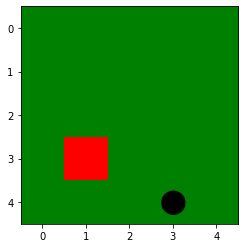

-----
step: 161
Robot's Current Position [4, 3]
Sensor/Bumper Information: {'north': False, 'south': True, 'west': False, 'east': False}
Is it Dirty?: False
Action east


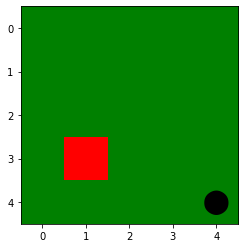

-----
step: 162
Robot's Current Position [4, 4]
Sensor/Bumper Information: {'north': False, 'south': True, 'west': False, 'east': True}
Is it Dirty?: False
Action north


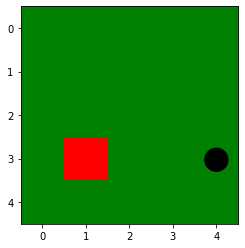

-----
step: 163
Robot's Current Position [3, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action west


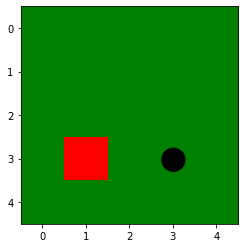

-----
step: 164
Robot's Current Position [3, 3]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action north


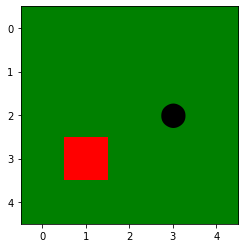

-----
step: 165
Robot's Current Position [2, 3]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action suck


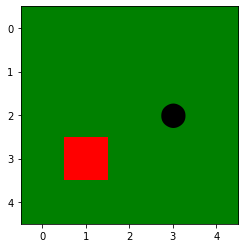

-----
step: 166
Robot's Current Position [2, 3]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action south


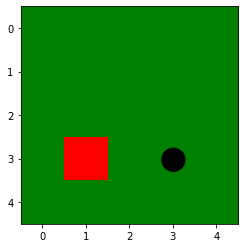

-----
step: 167
Robot's Current Position [3, 3]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action south


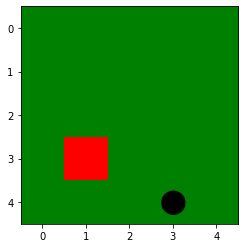

-----
step: 168
Robot's Current Position [4, 3]
Sensor/Bumper Information: {'north': False, 'south': True, 'west': False, 'east': False}
Is it Dirty?: False
Action suck


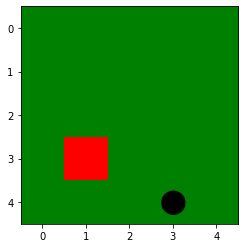

-----
step: 169
Robot's Current Position [4, 3]
Sensor/Bumper Information: {'north': False, 'south': True, 'west': False, 'east': False}
Is it Dirty?: False
Action suck


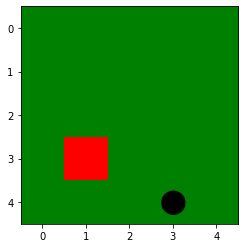

-----
step: 170
Robot's Current Position [4, 3]
Sensor/Bumper Information: {'north': False, 'south': True, 'west': False, 'east': False}
Is it Dirty?: False
Action east


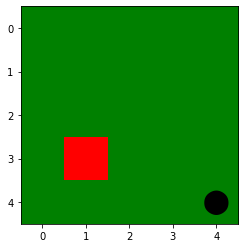

-----
step: 171
Robot's Current Position [4, 4]
Sensor/Bumper Information: {'north': False, 'south': True, 'west': False, 'east': True}
Is it Dirty?: False
Action north


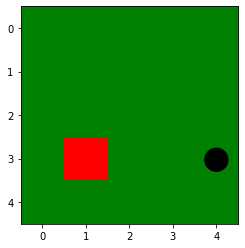

-----
step: 172
Robot's Current Position [3, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action suck


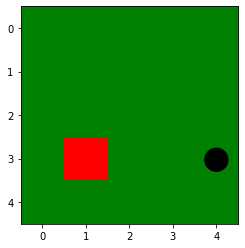

-----
step: 173
Robot's Current Position [3, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action east


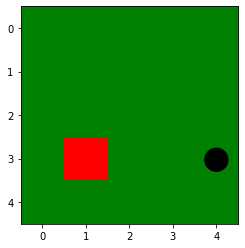

-----
step: 174
Robot's Current Position [3, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action west


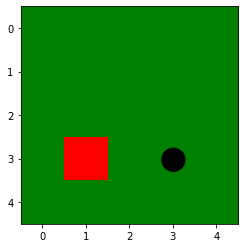

-----
step: 175
Robot's Current Position [3, 3]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action north


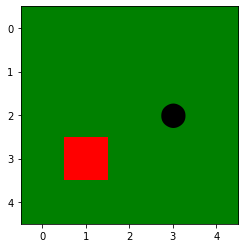

-----
step: 176
Robot's Current Position [2, 3]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action suck


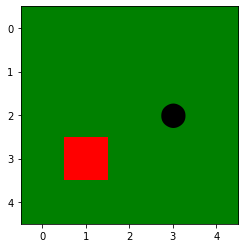

-----
step: 177
Robot's Current Position [2, 3]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action north


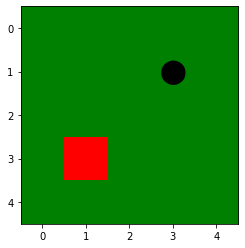

-----
step: 178
Robot's Current Position [1, 3]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action east


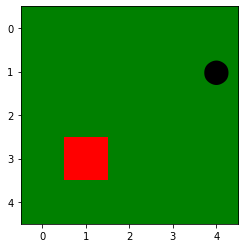

-----
step: 179
Robot's Current Position [1, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action north


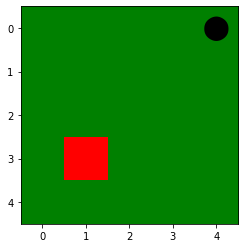

-----
step: 180
Robot's Current Position [0, 4]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action west


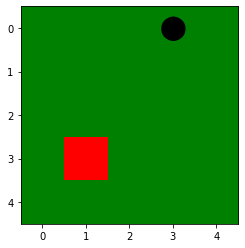

-----
step: 181
Robot's Current Position [0, 3]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action suck


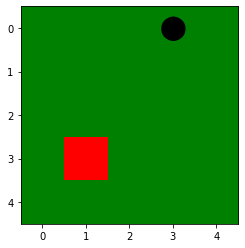

-----
step: 182
Robot's Current Position [0, 3]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action suck


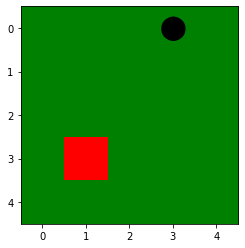

-----
step: 183
Robot's Current Position [0, 3]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action suck


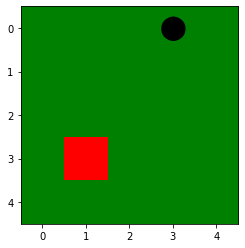

-----
step: 184
Robot's Current Position [0, 3]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action west


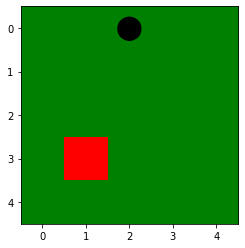

-----
step: 185
Robot's Current Position [0, 2]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action south


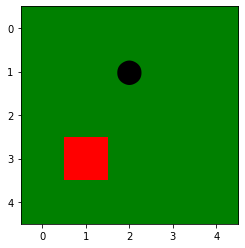

-----
step: 186
Robot's Current Position [1, 2]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action east


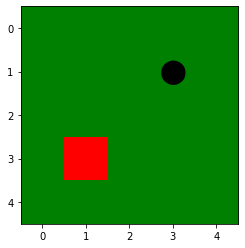

-----
step: 187
Robot's Current Position [1, 3]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action south


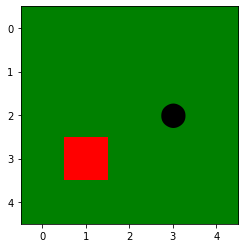

-----
step: 188
Robot's Current Position [2, 3]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action east


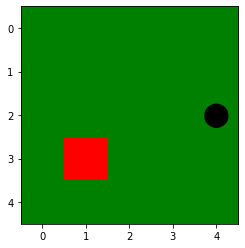

-----
step: 189
Robot's Current Position [2, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action suck


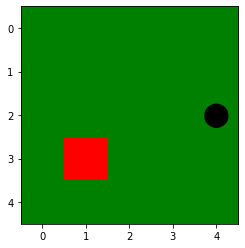

-----
step: 190
Robot's Current Position [2, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action east


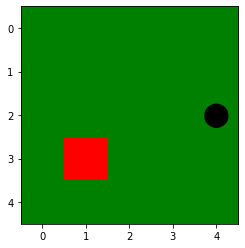

-----
step: 191
Robot's Current Position [2, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action north


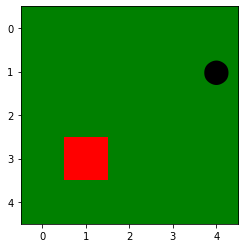

-----
step: 192
Robot's Current Position [1, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action east


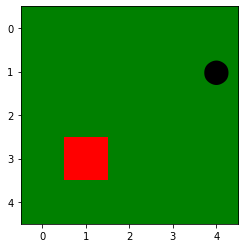

-----
step: 193
Robot's Current Position [1, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action east


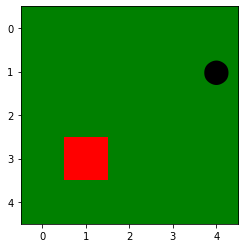

-----
step: 194
Robot's Current Position [1, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action west


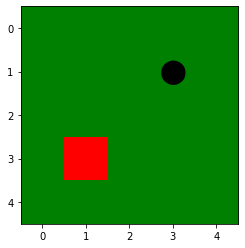

-----
step: 195
Robot's Current Position [1, 3]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action east


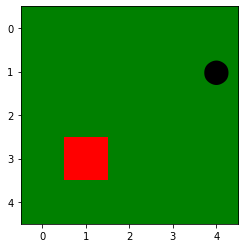

-----
step: 196
Robot's Current Position [1, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action east


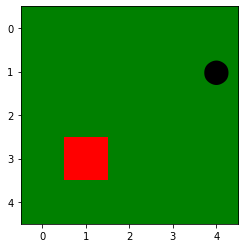

-----
step: 197
Robot's Current Position [1, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action suck


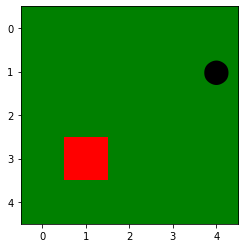

-----
step: 198
Robot's Current Position [1, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action suck


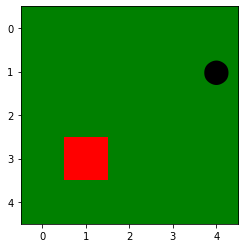

-----
step: 199
Robot's Current Position [1, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action east


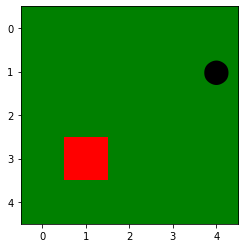

-----
step: 200
Robot's Current Position [1, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action west


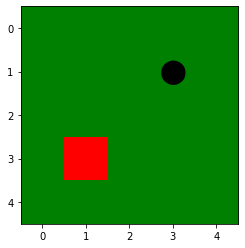

-----
step: 201
Robot's Current Position [1, 3]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action west


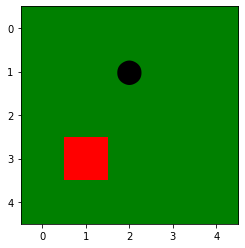

-----
step: 202
Robot's Current Position [1, 2]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action south


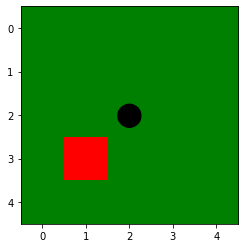

-----
step: 203
Robot's Current Position [2, 2]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action north


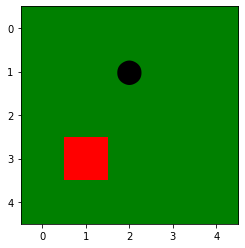

-----
step: 204
Robot's Current Position [1, 2]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action east


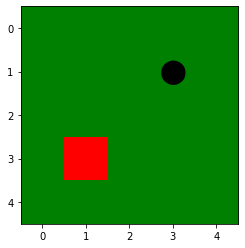

-----
step: 205
Robot's Current Position [1, 3]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action north


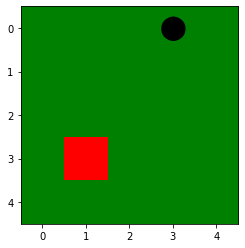

-----
step: 206
Robot's Current Position [0, 3]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action east


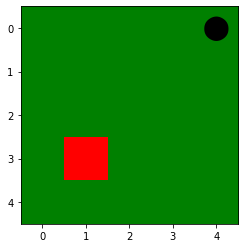

-----
step: 207
Robot's Current Position [0, 4]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action south


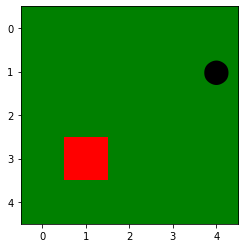

-----
step: 208
Robot's Current Position [1, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action suck


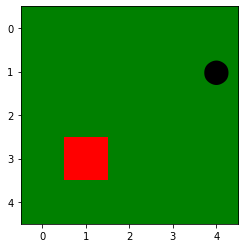

-----
step: 209
Robot's Current Position [1, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action east


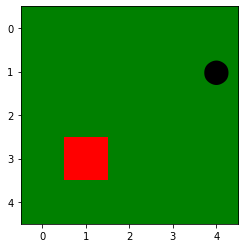

-----
step: 210
Robot's Current Position [1, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action south


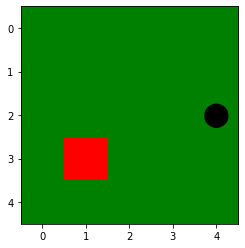

-----
step: 211
Robot's Current Position [2, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action east


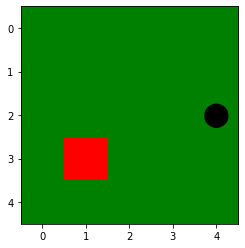

-----
step: 212
Robot's Current Position [2, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action east


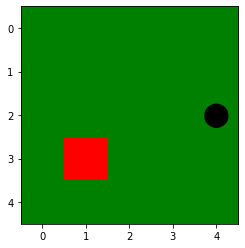

-----
step: 213
Robot's Current Position [2, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action north


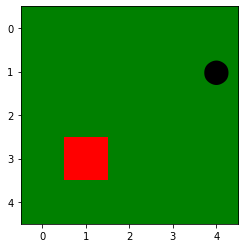

-----
step: 214
Robot's Current Position [1, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action east


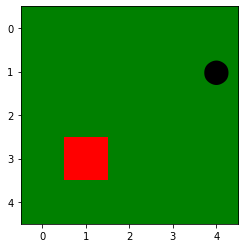

-----
step: 215
Robot's Current Position [1, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action east


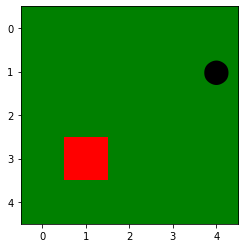

-----
step: 216
Robot's Current Position [1, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action suck


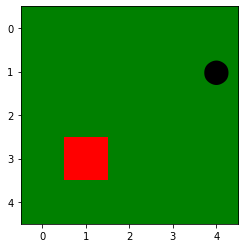

-----
step: 217
Robot's Current Position [1, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action east


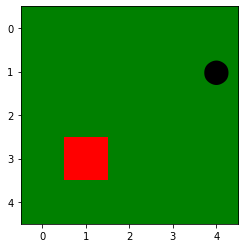

-----
step: 218
Robot's Current Position [1, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action suck


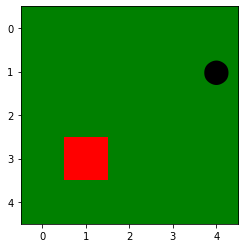

-----
step: 219
Robot's Current Position [1, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action north


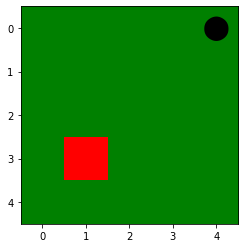

-----
step: 220
Robot's Current Position [0, 4]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action south


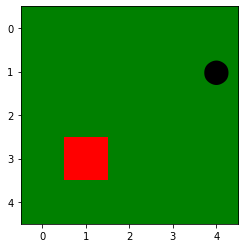

-----
step: 221
Robot's Current Position [1, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action suck


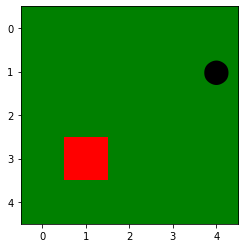

-----
step: 222
Robot's Current Position [1, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action suck


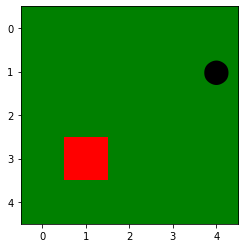

-----
step: 223
Robot's Current Position [1, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action suck


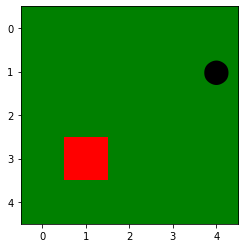

-----
step: 224
Robot's Current Position [1, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action east


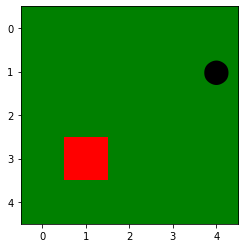

-----
step: 225
Robot's Current Position [1, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action north


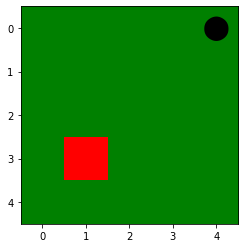

-----
step: 226
Robot's Current Position [0, 4]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action north


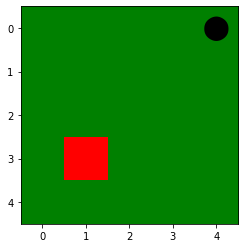

-----
step: 227
Robot's Current Position [0, 4]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action north


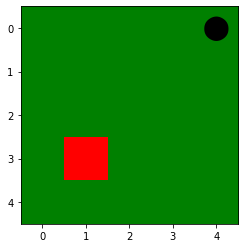

-----
step: 228
Robot's Current Position [0, 4]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action west


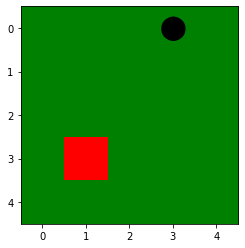

-----
step: 229
Robot's Current Position [0, 3]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action east


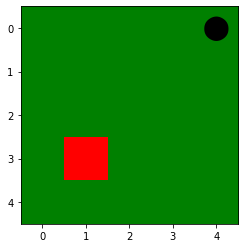

-----
step: 230
Robot's Current Position [0, 4]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action east


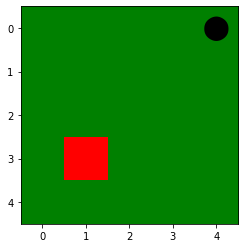

-----
step: 231
Robot's Current Position [0, 4]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action suck


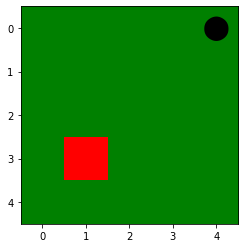

-----
step: 232
Robot's Current Position [0, 4]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action east


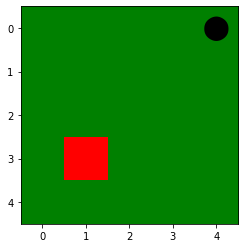

-----
step: 233
Robot's Current Position [0, 4]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action east


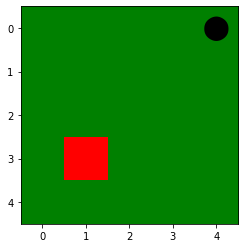

-----
step: 234
Robot's Current Position [0, 4]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action west


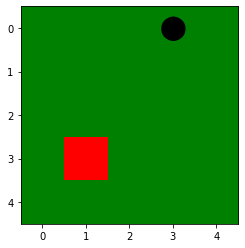

-----
step: 235
Robot's Current Position [0, 3]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action suck


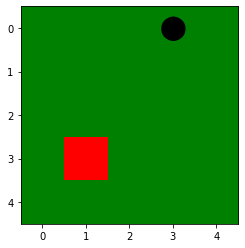

-----
step: 236
Robot's Current Position [0, 3]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action west


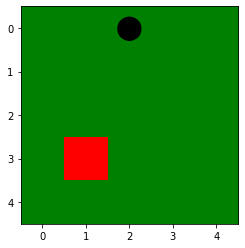

-----
step: 237
Robot's Current Position [0, 2]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action suck


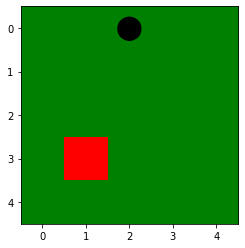

-----
step: 238
Robot's Current Position [0, 2]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action west


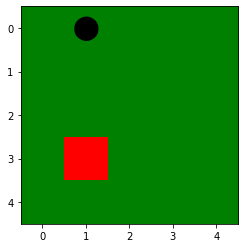

-----
step: 239
Robot's Current Position [0, 1]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action east


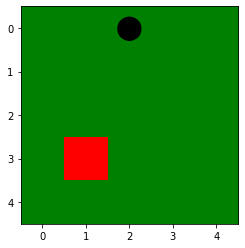

-----
step: 240
Robot's Current Position [0, 2]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action west


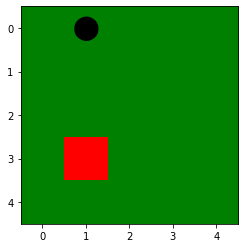

-----
step: 241
Robot's Current Position [0, 1]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action west


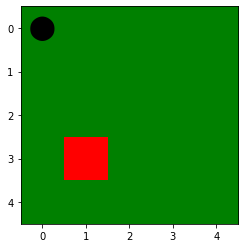

-----
step: 242
Robot's Current Position [0, 0]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action south


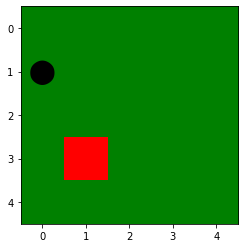

-----
step: 243
Robot's Current Position [1, 0]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action north


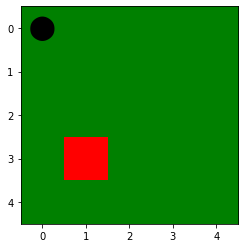

-----
step: 244
Robot's Current Position [0, 0]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action west


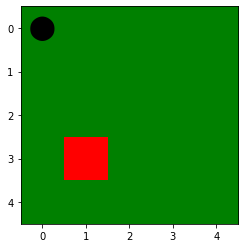

-----
step: 245
Robot's Current Position [0, 0]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action suck


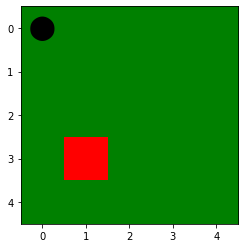

-----
step: 246
Robot's Current Position [0, 0]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action suck


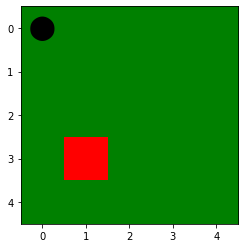

-----
step: 247
Robot's Current Position [0, 0]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action south


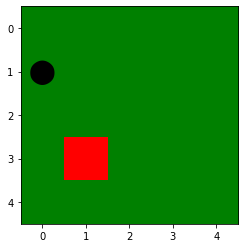

-----
step: 248
Robot's Current Position [1, 0]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action suck


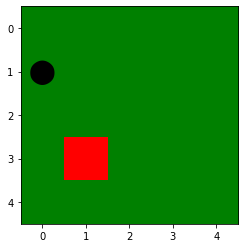

-----
step: 249
Robot's Current Position [1, 0]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action west


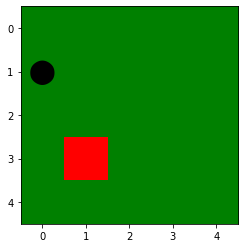

-----
step: 250
Robot's Current Position [1, 0]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action north


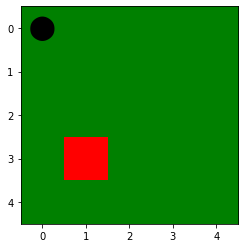

-----
step: 251
Robot's Current Position [0, 0]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action west


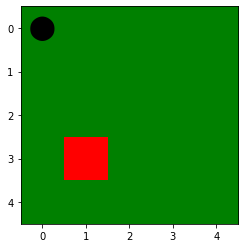

-----
step: 252
Robot's Current Position [0, 0]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action north


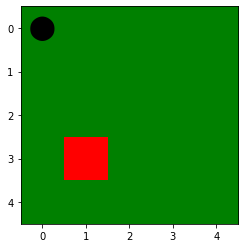

-----
step: 253
Robot's Current Position [0, 0]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action west


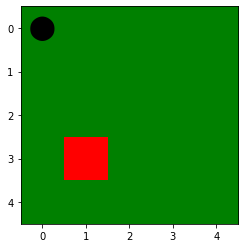

-----
step: 254
Robot's Current Position [0, 0]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action west


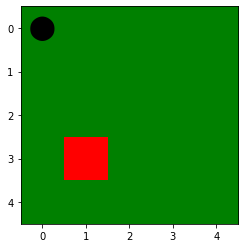

-----
step: 255
Robot's Current Position [0, 0]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action south


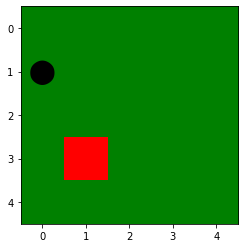

-----
step: 256
Robot's Current Position [1, 0]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action south


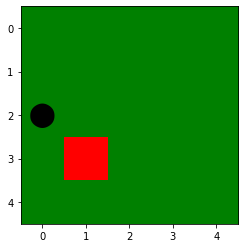

-----
step: 257
Robot's Current Position [2, 0]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action north


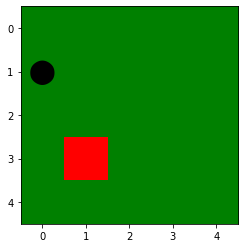

-----
step: 258
Robot's Current Position [1, 0]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action east


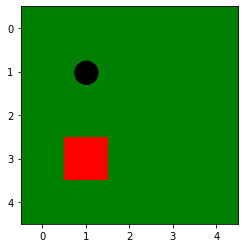

-----
step: 259
Robot's Current Position [1, 1]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action south


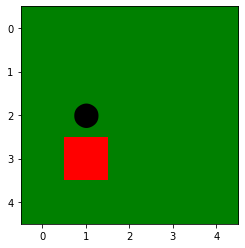

-----
step: 260
Robot's Current Position [2, 1]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action east


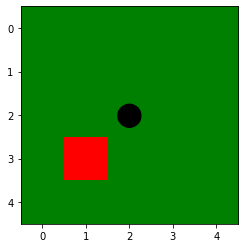

-----
step: 261
Robot's Current Position [2, 2]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action suck


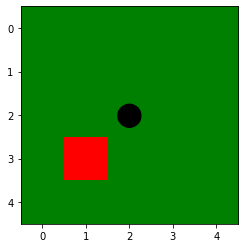

-----
step: 262
Robot's Current Position [2, 2]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action east


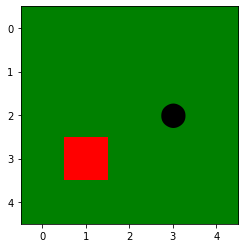

-----
step: 263
Robot's Current Position [2, 3]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action east


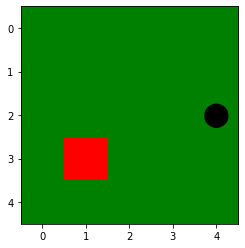

-----
step: 264
Robot's Current Position [2, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action east


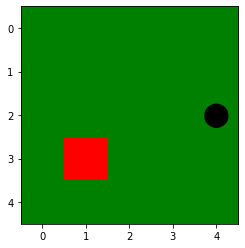

-----
step: 265
Robot's Current Position [2, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action south


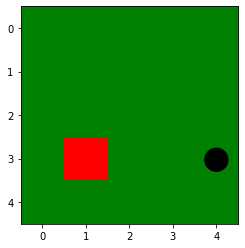

-----
step: 266
Robot's Current Position [3, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action north


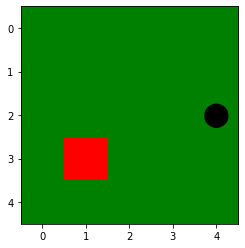

-----
step: 267
Robot's Current Position [2, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action south


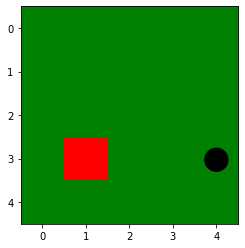

-----
step: 268
Robot's Current Position [3, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action east


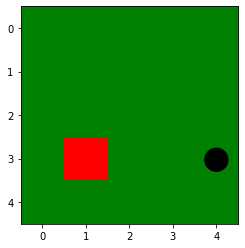

-----
step: 269
Robot's Current Position [3, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action north


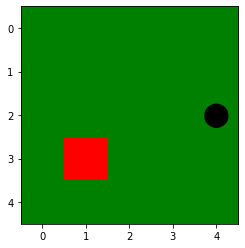

-----
step: 270
Robot's Current Position [2, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action south


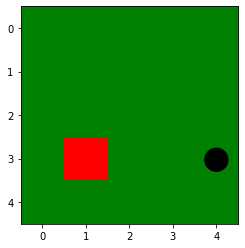

-----
step: 271
Robot's Current Position [3, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action north


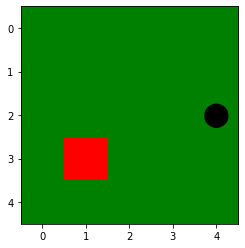

-----
step: 272
Robot's Current Position [2, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action suck


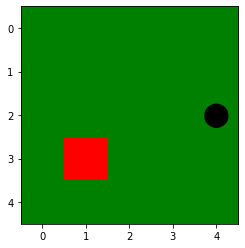

-----
step: 273
Robot's Current Position [2, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action south


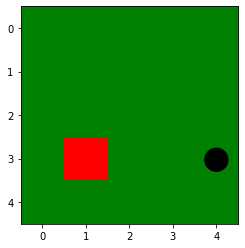

-----
step: 274
Robot's Current Position [3, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action suck


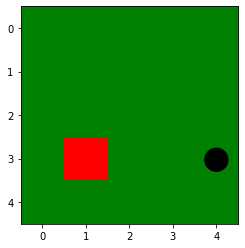

-----
step: 275
Robot's Current Position [3, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action west


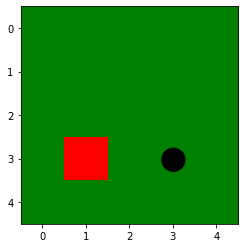

-----
step: 276
Robot's Current Position [3, 3]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action east


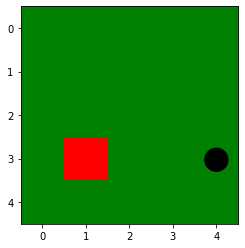

-----
step: 277
Robot's Current Position [3, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action north


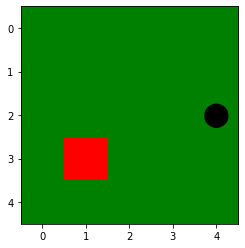

-----
step: 278
Robot's Current Position [2, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action west


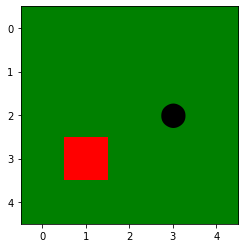

-----
step: 279
Robot's Current Position [2, 3]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action north


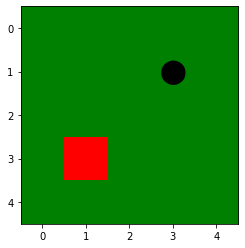

-----
step: 280
Robot's Current Position [1, 3]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action suck


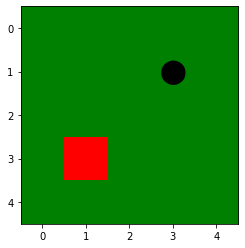

-----
step: 281
Robot's Current Position [1, 3]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action east


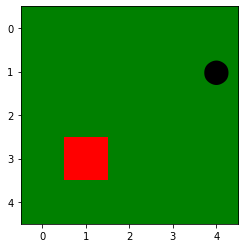

-----
step: 282
Robot's Current Position [1, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action north


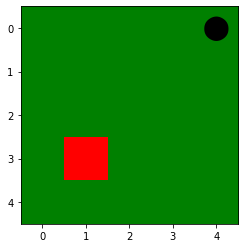

-----
step: 283
Robot's Current Position [0, 4]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action west


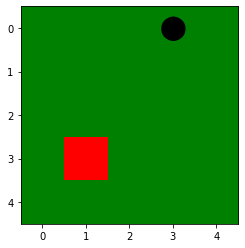

-----
step: 284
Robot's Current Position [0, 3]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action suck


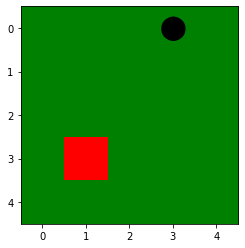

-----
step: 285
Robot's Current Position [0, 3]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action east


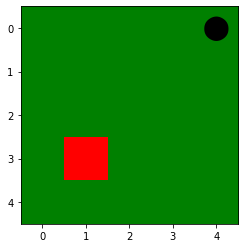

-----
step: 286
Robot's Current Position [0, 4]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action south


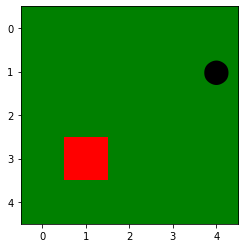

-----
step: 287
Robot's Current Position [1, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action east


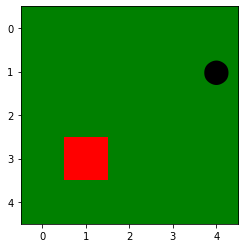

-----
step: 288
Robot's Current Position [1, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action north


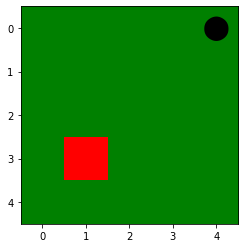

-----
step: 289
Robot's Current Position [0, 4]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action suck


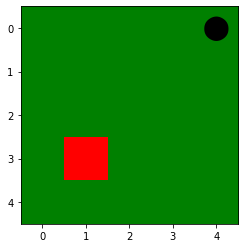

-----
step: 290
Robot's Current Position [0, 4]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action north


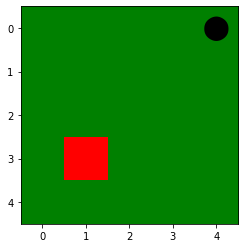

-----
step: 291
Robot's Current Position [0, 4]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action north


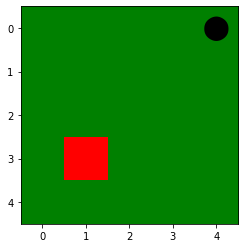

-----
step: 292
Robot's Current Position [0, 4]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action north


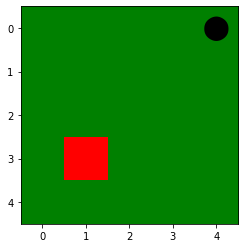

-----
step: 293
Robot's Current Position [0, 4]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action north


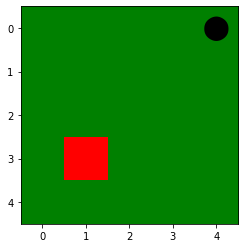

-----
step: 294
Robot's Current Position [0, 4]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action west


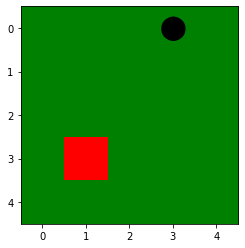

-----
step: 295
Robot's Current Position [0, 3]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action suck


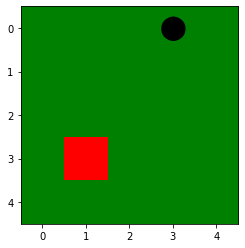

-----
step: 296
Robot's Current Position [0, 3]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action north


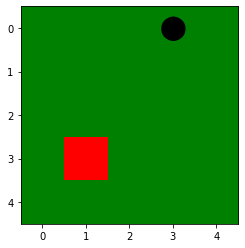

-----
step: 297
Robot's Current Position [0, 3]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action north


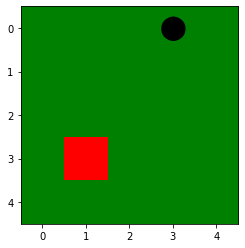

-----
step: 298
Robot's Current Position [0, 3]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action south


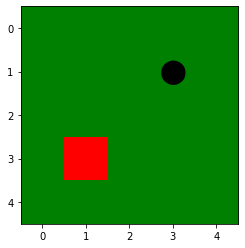

-----
step: 299
Robot's Current Position [1, 3]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action south


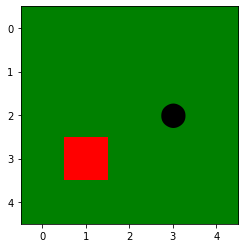

-----
step: 300
Robot's Current Position [2, 3]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action west


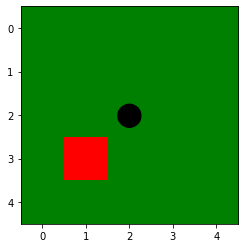

-----
step: 301
Robot's Current Position [2, 2]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action west


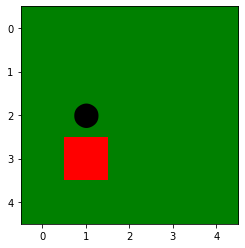

-----
step: 302
Robot's Current Position [2, 1]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action east


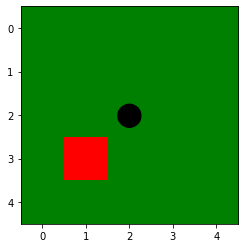

-----
step: 303
Robot's Current Position [2, 2]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action east


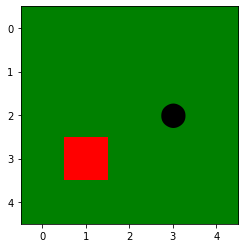

-----
step: 304
Robot's Current Position [2, 3]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action east


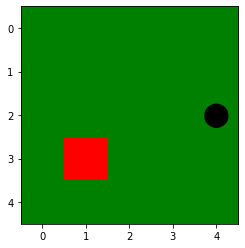

-----
step: 305
Robot's Current Position [2, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action east


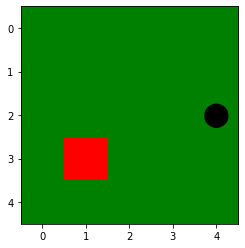

-----
step: 306
Robot's Current Position [2, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action south


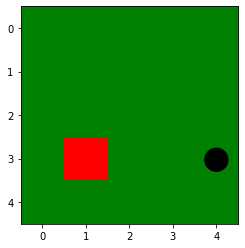

-----
step: 307
Robot's Current Position [3, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action north


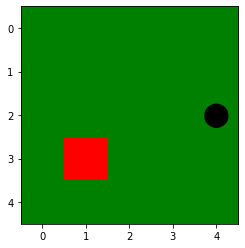

-----
step: 308
Robot's Current Position [2, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action west


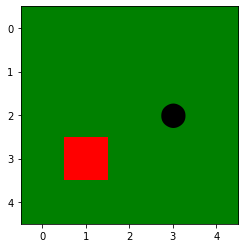

-----
step: 309
Robot's Current Position [2, 3]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action west


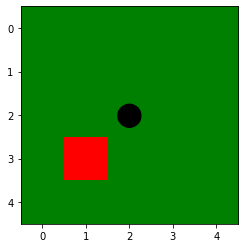

-----
step: 310
Robot's Current Position [2, 2]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action north


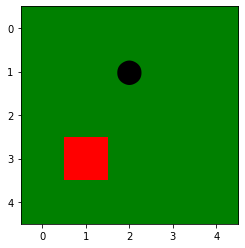

-----
step: 311
Robot's Current Position [1, 2]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action west


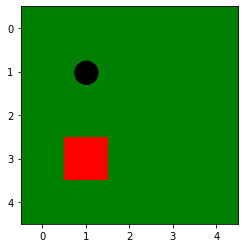

-----
step: 312
Robot's Current Position [1, 1]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action west


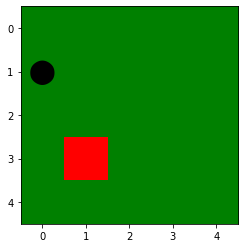

-----
step: 313
Robot's Current Position [1, 0]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action north


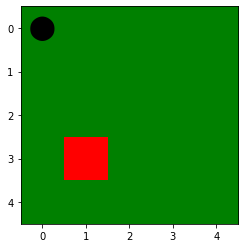

-----
step: 314
Robot's Current Position [0, 0]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action suck


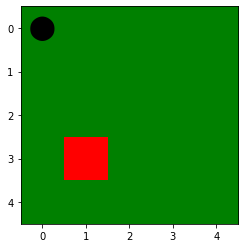

-----
step: 315
Robot's Current Position [0, 0]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action north


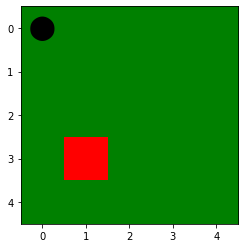

-----
step: 316
Robot's Current Position [0, 0]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action north


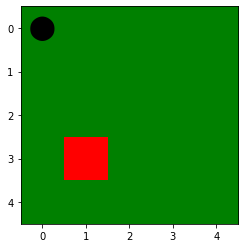

-----
step: 317
Robot's Current Position [0, 0]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action west


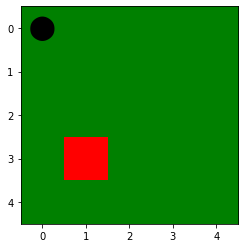

-----
step: 318
Robot's Current Position [0, 0]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action west


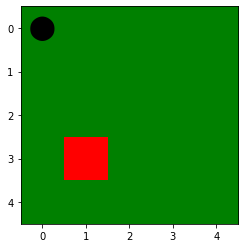

-----
step: 319
Robot's Current Position [0, 0]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action north


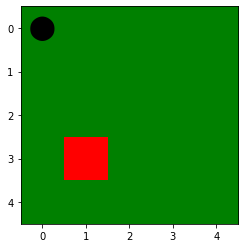

-----
step: 320
Robot's Current Position [0, 0]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action west


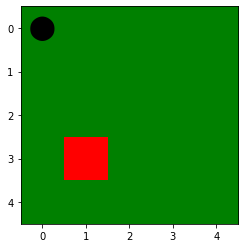

-----
step: 321
Robot's Current Position [0, 0]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action west


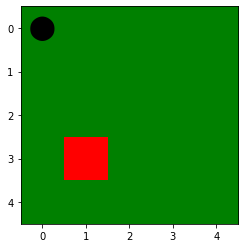

-----
step: 322
Robot's Current Position [0, 0]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action east


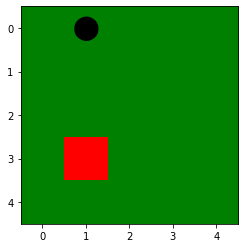

-----
step: 323
Robot's Current Position [0, 1]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action north


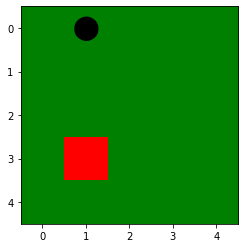

-----
step: 324
Robot's Current Position [0, 1]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action west


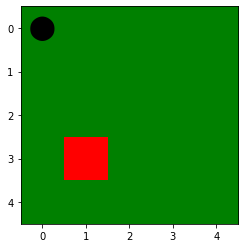

-----
step: 325
Robot's Current Position [0, 0]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action suck


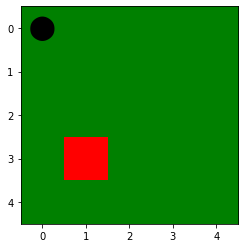

-----
step: 326
Robot's Current Position [0, 0]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action suck


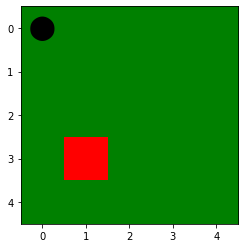

-----
step: 327
Robot's Current Position [0, 0]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action south


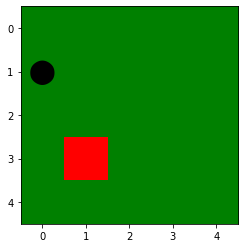

-----
step: 328
Robot's Current Position [1, 0]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action west


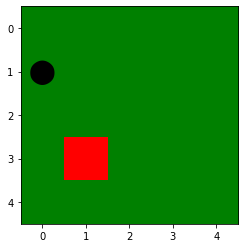

-----
step: 329
Robot's Current Position [1, 0]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action north


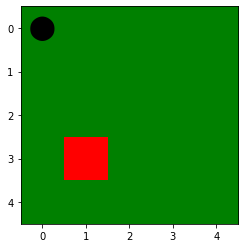

-----
step: 330
Robot's Current Position [0, 0]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action south


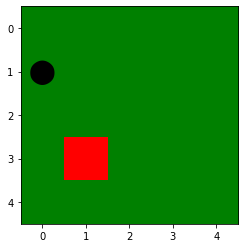

-----
step: 331
Robot's Current Position [1, 0]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action east


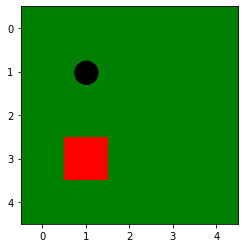

-----
step: 332
Robot's Current Position [1, 1]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action suck


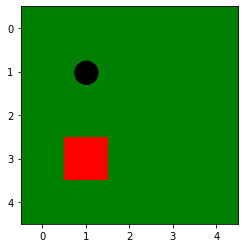

-----
step: 333
Robot's Current Position [1, 1]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action north


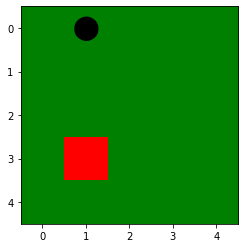

-----
step: 334
Robot's Current Position [0, 1]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action suck


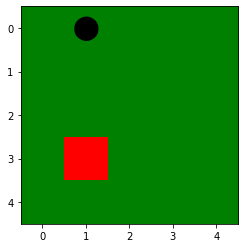

-----
step: 335
Robot's Current Position [0, 1]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action north


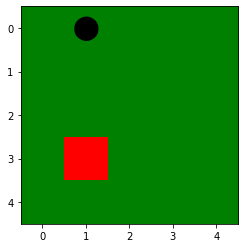

-----
step: 336
Robot's Current Position [0, 1]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action east


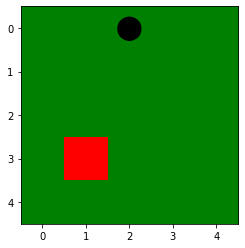

-----
step: 337
Robot's Current Position [0, 2]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action suck


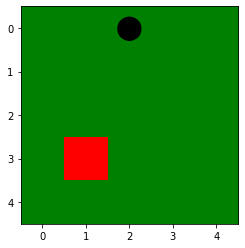

-----
step: 338
Robot's Current Position [0, 2]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action south


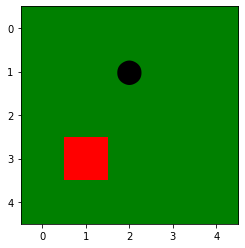

-----
step: 339
Robot's Current Position [1, 2]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action south


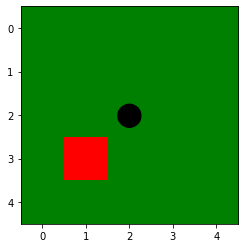

-----
step: 340
Robot's Current Position [2, 2]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action suck


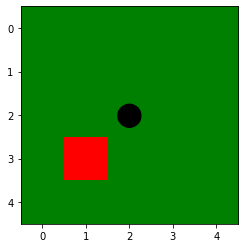

-----
step: 341
Robot's Current Position [2, 2]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action west


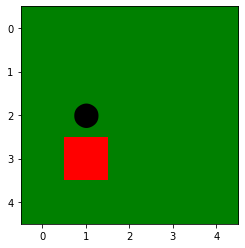

-----
step: 342
Robot's Current Position [2, 1]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action south


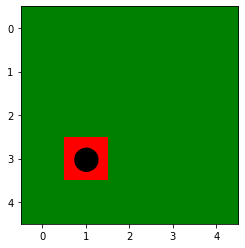

-----
step: 343
Robot's Current Position [3, 1]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: True
Action north


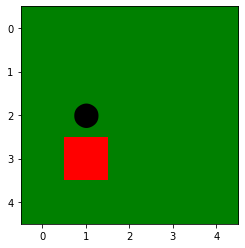

-----
step: 344
Robot's Current Position [2, 1]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action suck


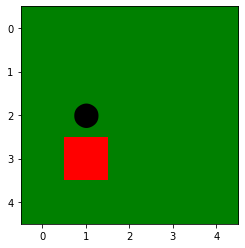

-----
step: 345
Robot's Current Position [2, 1]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action east


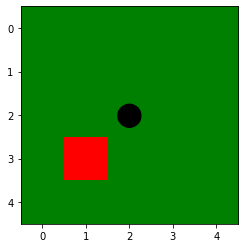

-----
step: 346
Robot's Current Position [2, 2]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action north


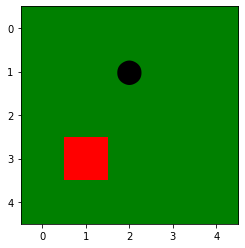

-----
step: 347
Robot's Current Position [1, 2]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action west


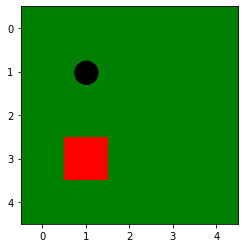

-----
step: 348
Robot's Current Position [1, 1]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action suck


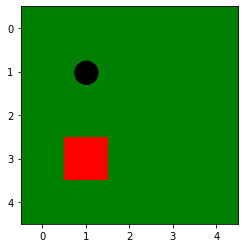

-----
step: 349
Robot's Current Position [1, 1]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action suck


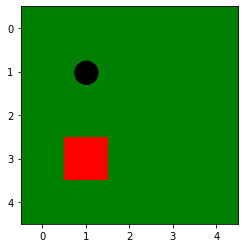

-----
step: 350
Robot's Current Position [1, 1]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action north


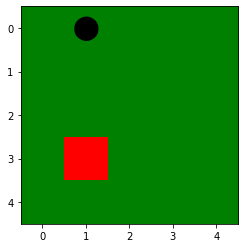

-----
step: 351
Robot's Current Position [0, 1]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action north


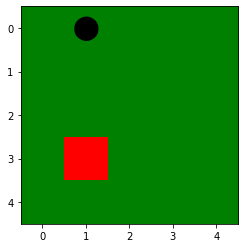

-----
step: 352
Robot's Current Position [0, 1]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action south


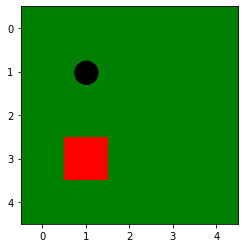

-----
step: 353
Robot's Current Position [1, 1]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action north


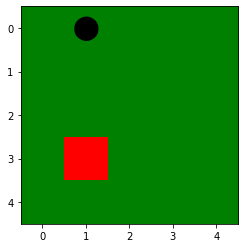

-----
step: 354
Robot's Current Position [0, 1]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action north


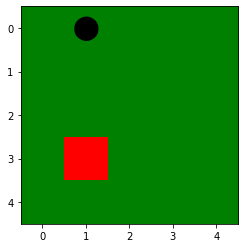

-----
step: 355
Robot's Current Position [0, 1]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action east


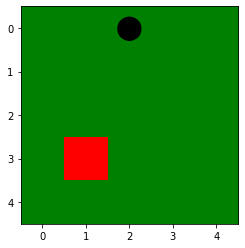

-----
step: 356
Robot's Current Position [0, 2]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action east


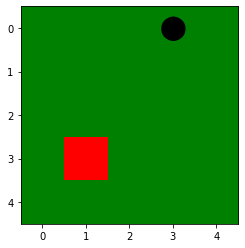

-----
step: 357
Robot's Current Position [0, 3]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action suck


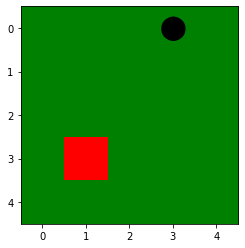

-----
step: 358
Robot's Current Position [0, 3]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action south


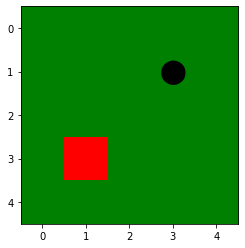

-----
step: 359
Robot's Current Position [1, 3]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action south


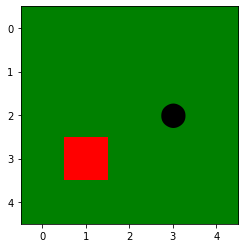

-----
step: 360
Robot's Current Position [2, 3]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action west


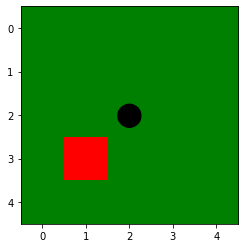

-----
step: 361
Robot's Current Position [2, 2]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action south


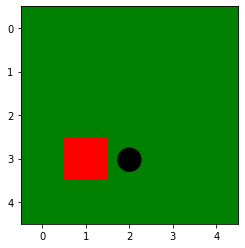

-----
step: 362
Robot's Current Position [3, 2]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action west


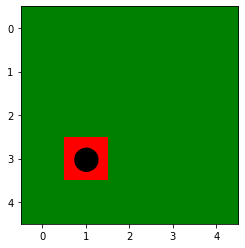

-----
step: 363
Robot's Current Position [3, 1]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: True
Action suck


[3, 363]

In [6]:
vacuum_environment(simple_randomized_agent, n = 5, maxsteps = 10000, verbose = True)

## Task 2:  Implement a simple reflex agent [10 Points] 

The simple reflex agent randomly walks around but reacts to the bumper sensor by not bumping into the wall and to dirt with sucking. Implement the agent program as a function.

_Note:_ Agents cannot directly use variable in the environment. They only gets the percepts as the arguments to the agent function.

In [7]:
# Your code and description goes here

def simple_reflex_agent(bumpers,dirty):

    directions = ["north", "east", "west", "south"]

    if dirty == True:

        return "suck";
#randomly choose directions and find bumper 
    else :

        if bumpers["north"]:

            directions.remove("north")

        if bumpers["east"]:

            directions.remove("east")

        if bumpers["west"]:

            directions.remove("west")

        if bumpers["south"]:

            directions.remove("south")

        return np.random.choice(directions)
   

Environment with Dirt Location:
 [[False False False False False]
 [False False False False False]
 [ True False False False False]
 [False  True False False False]
 [ True False  True False False]]
Total Dirty Squares: 4

Initialize simulation


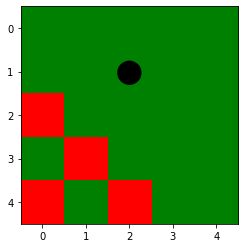

-----
step: 1
Robot's Current Position [1, 2]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action north


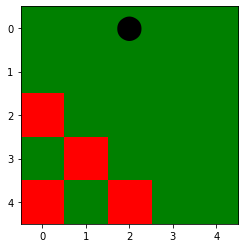

-----
step: 2
Robot's Current Position [0, 2]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action west


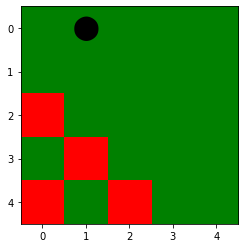

-----
step: 3
Robot's Current Position [0, 1]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action west


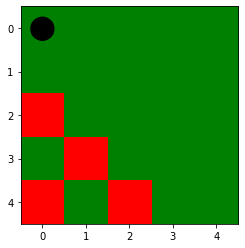

-----
step: 4
Robot's Current Position [0, 0]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action south


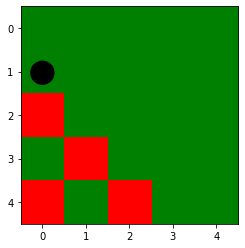

-----
step: 5
Robot's Current Position [1, 0]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action north


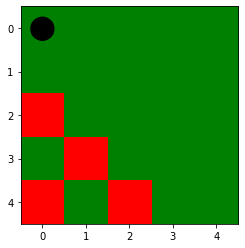

-----
step: 6
Robot's Current Position [0, 0]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action east


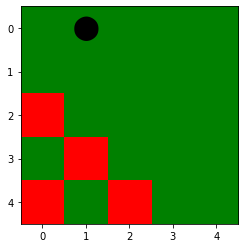

-----
step: 7
Robot's Current Position [0, 1]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action west


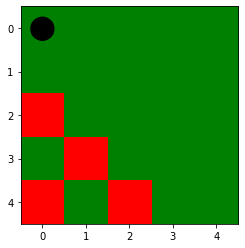

-----
step: 8
Robot's Current Position [0, 0]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action east


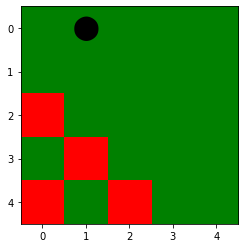

-----
step: 9
Robot's Current Position [0, 1]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action west


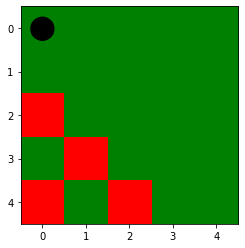

-----
step: 10
Robot's Current Position [0, 0]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action south


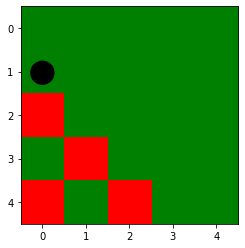

-----
step: 11
Robot's Current Position [1, 0]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action north


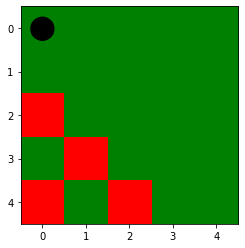

-----
step: 12
Robot's Current Position [0, 0]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action east


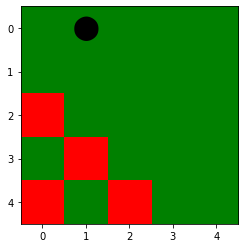

-----
step: 13
Robot's Current Position [0, 1]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action east


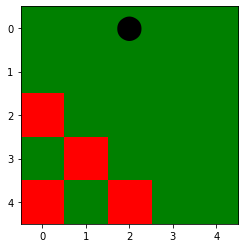

-----
step: 14
Robot's Current Position [0, 2]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action east


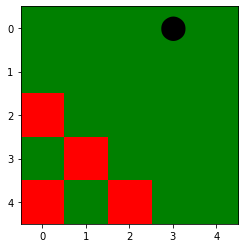

-----
step: 15
Robot's Current Position [0, 3]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action south


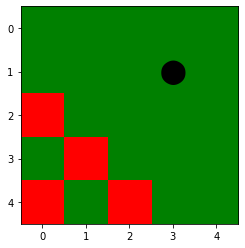

-----
step: 16
Robot's Current Position [1, 3]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action east


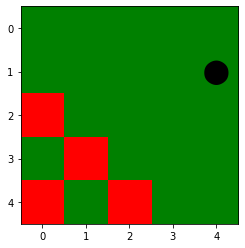

-----
step: 17
Robot's Current Position [1, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action north


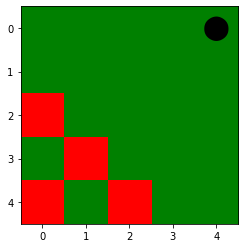

-----
step: 18
Robot's Current Position [0, 4]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action west


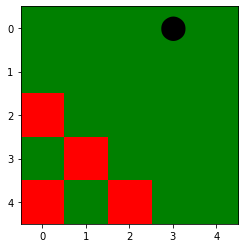

-----
step: 19
Robot's Current Position [0, 3]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action south


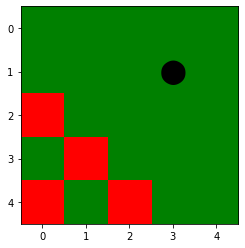

-----
step: 20
Robot's Current Position [1, 3]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action south


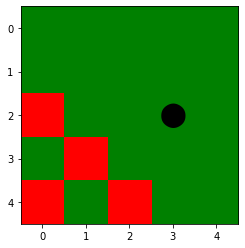

-----
step: 21
Robot's Current Position [2, 3]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action west


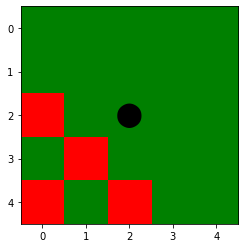

-----
step: 22
Robot's Current Position [2, 2]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action west


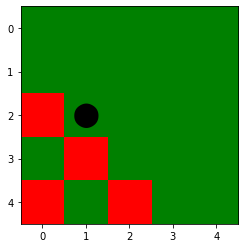

-----
step: 23
Robot's Current Position [2, 1]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action east


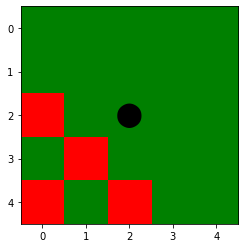

-----
step: 24
Robot's Current Position [2, 2]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action west


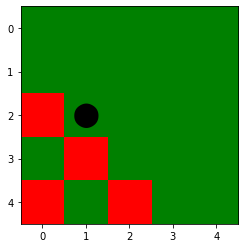

-----
step: 25
Robot's Current Position [2, 1]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action west


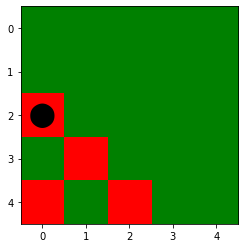

-----
step: 26
Robot's Current Position [2, 0]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': True, 'east': False}
Is it Dirty?: True
Action suck


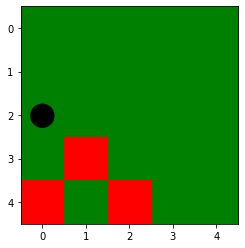

-----
step: 27
Robot's Current Position [2, 0]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action east


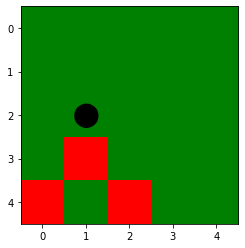

-----
step: 28
Robot's Current Position [2, 1]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action south


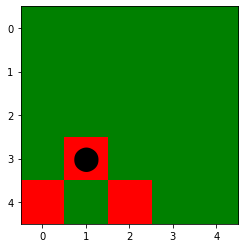

-----
step: 29
Robot's Current Position [3, 1]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: True
Action suck


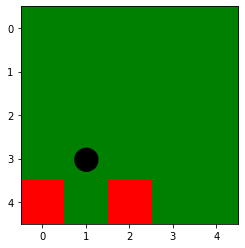

-----
step: 30
Robot's Current Position [3, 1]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action west


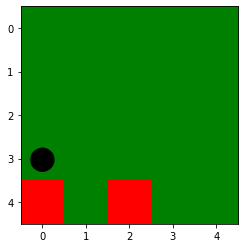

-----
step: 31
Robot's Current Position [3, 0]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action north


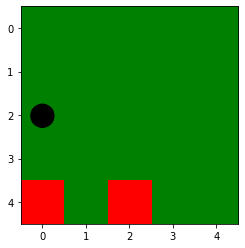

-----
step: 32
Robot's Current Position [2, 0]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action north


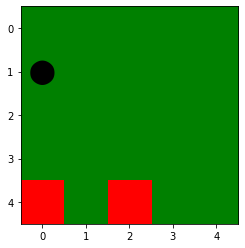

-----
step: 33
Robot's Current Position [1, 0]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action north


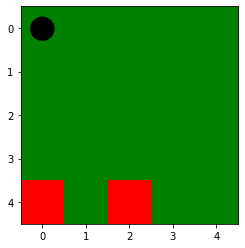

-----
step: 34
Robot's Current Position [0, 0]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action south


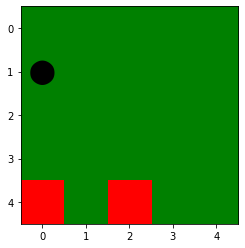

-----
step: 35
Robot's Current Position [1, 0]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action east


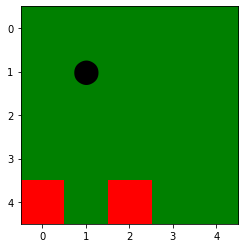

-----
step: 36
Robot's Current Position [1, 1]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action east


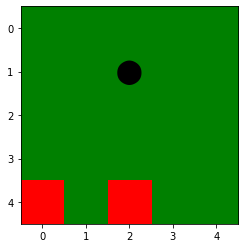

-----
step: 37
Robot's Current Position [1, 2]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action east


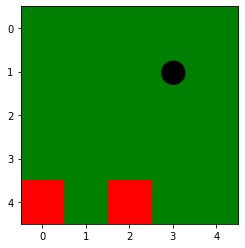

-----
step: 38
Robot's Current Position [1, 3]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action north


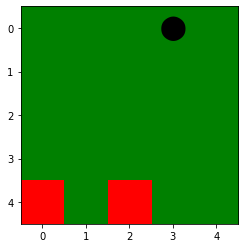

-----
step: 39
Robot's Current Position [0, 3]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action west


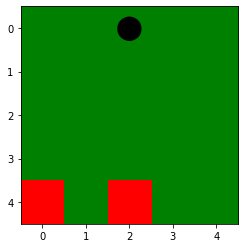

-----
step: 40
Robot's Current Position [0, 2]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action west


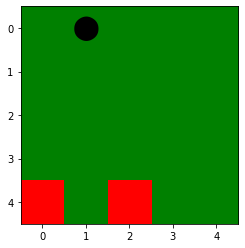

-----
step: 41
Robot's Current Position [0, 1]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action south


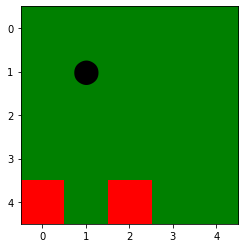

-----
step: 42
Robot's Current Position [1, 1]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action west


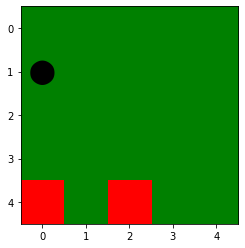

-----
step: 43
Robot's Current Position [1, 0]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action north


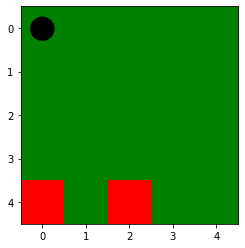

-----
step: 44
Robot's Current Position [0, 0]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action south


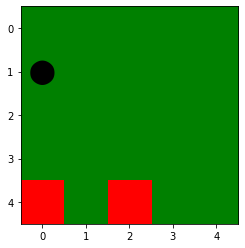

-----
step: 45
Robot's Current Position [1, 0]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action north


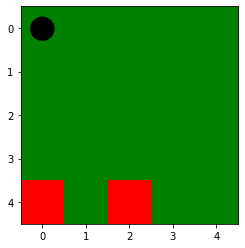

-----
step: 46
Robot's Current Position [0, 0]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action south


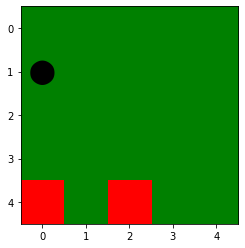

-----
step: 47
Robot's Current Position [1, 0]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action south


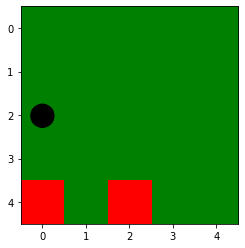

-----
step: 48
Robot's Current Position [2, 0]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action east


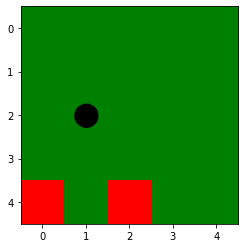

-----
step: 49
Robot's Current Position [2, 1]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action west


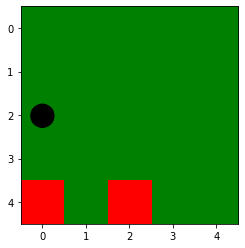

-----
step: 50
Robot's Current Position [2, 0]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action north


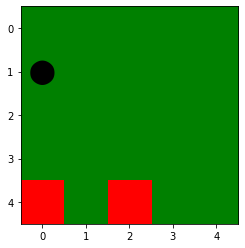

-----
step: 51
Robot's Current Position [1, 0]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action north


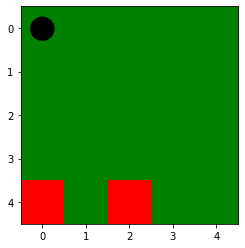

-----
step: 52
Robot's Current Position [0, 0]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action south


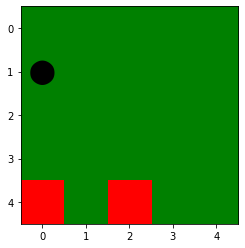

-----
step: 53
Robot's Current Position [1, 0]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action south


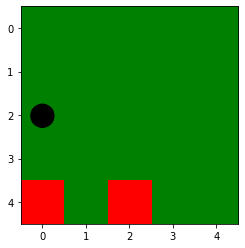

-----
step: 54
Robot's Current Position [2, 0]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action north


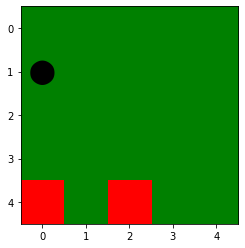

-----
step: 55
Robot's Current Position [1, 0]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action south


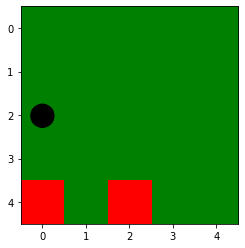

-----
step: 56
Robot's Current Position [2, 0]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action north


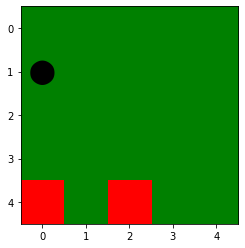

-----
step: 57
Robot's Current Position [1, 0]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action north


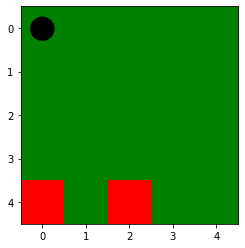

-----
step: 58
Robot's Current Position [0, 0]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action south


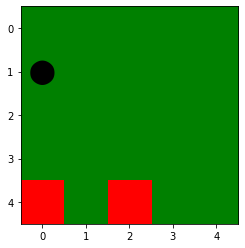

-----
step: 59
Robot's Current Position [1, 0]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action east


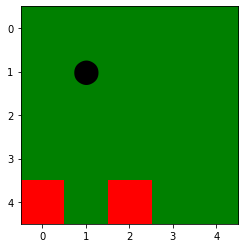

-----
step: 60
Robot's Current Position [1, 1]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action west


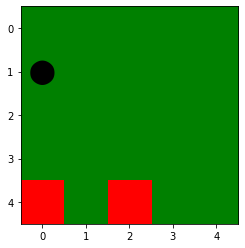

-----
step: 61
Robot's Current Position [1, 0]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action south


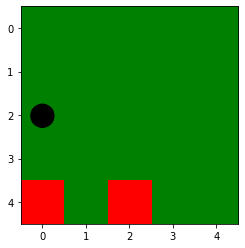

-----
step: 62
Robot's Current Position [2, 0]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action east


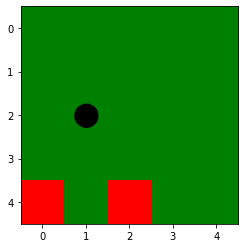

-----
step: 63
Robot's Current Position [2, 1]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action east


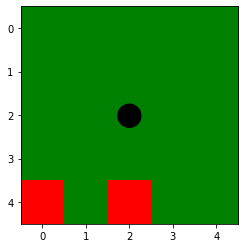

-----
step: 64
Robot's Current Position [2, 2]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action north


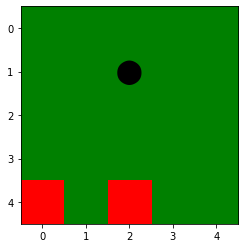

-----
step: 65
Robot's Current Position [1, 2]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action north


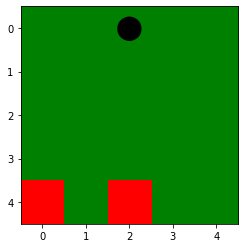

-----
step: 66
Robot's Current Position [0, 2]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action west


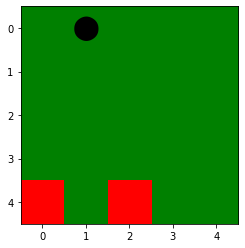

-----
step: 67
Robot's Current Position [0, 1]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action east


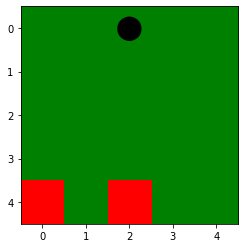

-----
step: 68
Robot's Current Position [0, 2]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action west


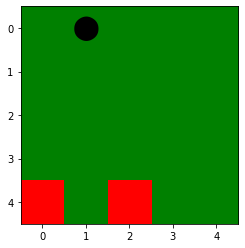

-----
step: 69
Robot's Current Position [0, 1]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action west


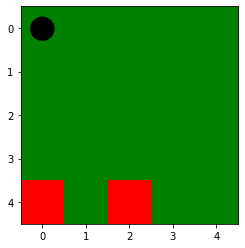

-----
step: 70
Robot's Current Position [0, 0]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action south


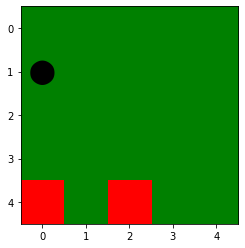

-----
step: 71
Robot's Current Position [1, 0]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action east


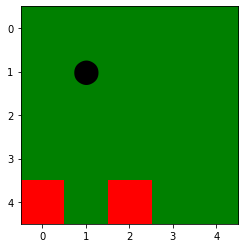

-----
step: 72
Robot's Current Position [1, 1]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action north


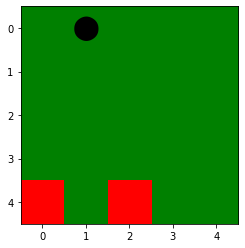

-----
step: 73
Robot's Current Position [0, 1]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action west


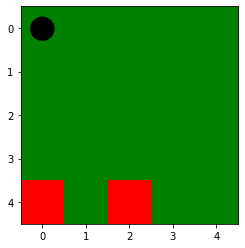

-----
step: 74
Robot's Current Position [0, 0]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action south


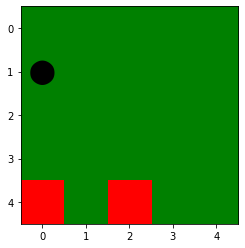

-----
step: 75
Robot's Current Position [1, 0]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action north


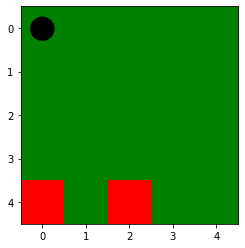

-----
step: 76
Robot's Current Position [0, 0]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action east


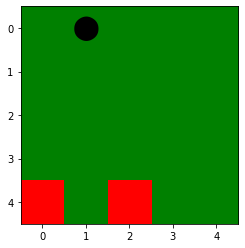

-----
step: 77
Robot's Current Position [0, 1]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action west


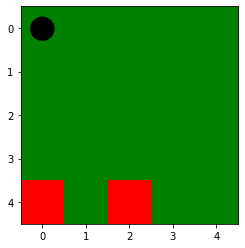

-----
step: 78
Robot's Current Position [0, 0]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action south


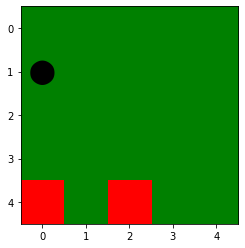

-----
step: 79
Robot's Current Position [1, 0]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action east


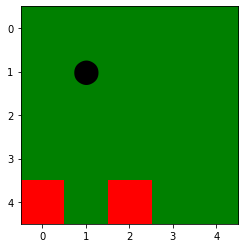

-----
step: 80
Robot's Current Position [1, 1]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action east


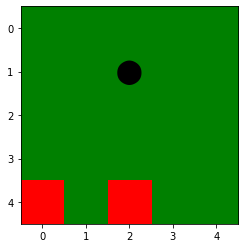

-----
step: 81
Robot's Current Position [1, 2]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action north


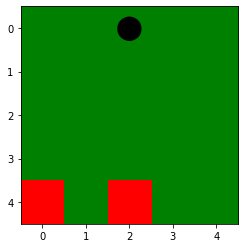

-----
step: 82
Robot's Current Position [0, 2]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action east


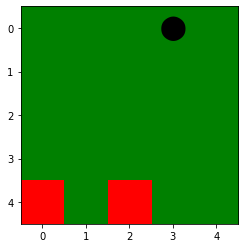

-----
step: 83
Robot's Current Position [0, 3]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action south


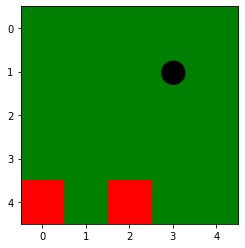

-----
step: 84
Robot's Current Position [1, 3]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action north


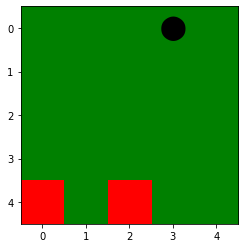

-----
step: 85
Robot's Current Position [0, 3]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action south


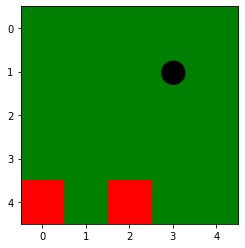

-----
step: 86
Robot's Current Position [1, 3]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action west


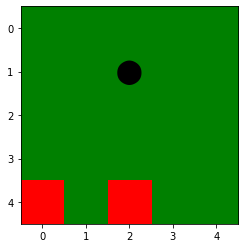

-----
step: 87
Robot's Current Position [1, 2]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action east


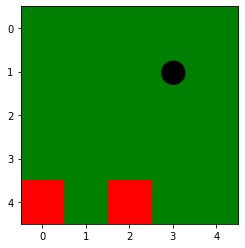

-----
step: 88
Robot's Current Position [1, 3]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action east


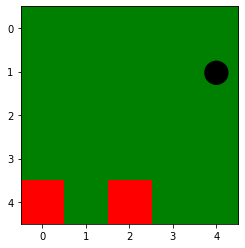

-----
step: 89
Robot's Current Position [1, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action west


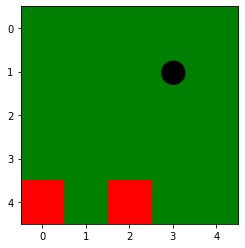

-----
step: 90
Robot's Current Position [1, 3]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action west


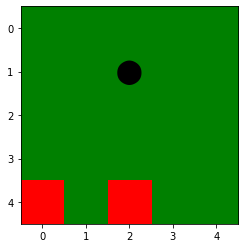

-----
step: 91
Robot's Current Position [1, 2]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action north


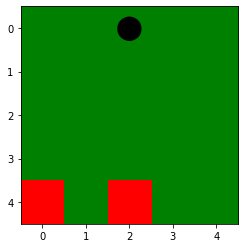

-----
step: 92
Robot's Current Position [0, 2]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action west


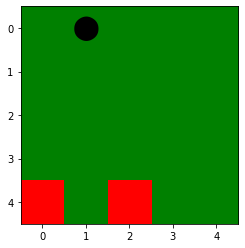

-----
step: 93
Robot's Current Position [0, 1]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action east


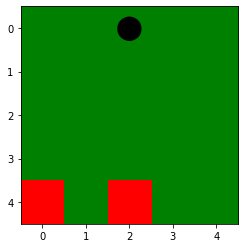

-----
step: 94
Robot's Current Position [0, 2]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action south


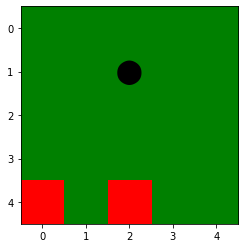

-----
step: 95
Robot's Current Position [1, 2]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action south


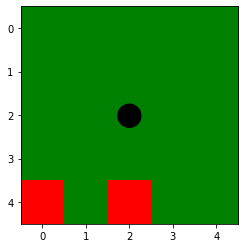

-----
step: 96
Robot's Current Position [2, 2]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action west


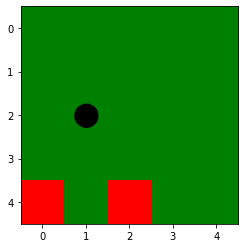

-----
step: 97
Robot's Current Position [2, 1]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action west


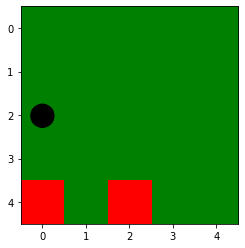

-----
step: 98
Robot's Current Position [2, 0]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action east


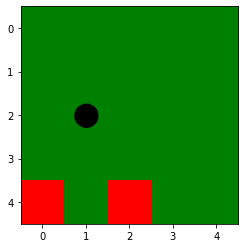

-----
step: 99
Robot's Current Position [2, 1]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action east


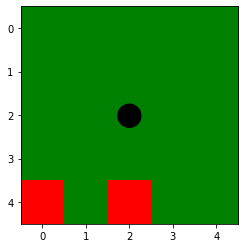

-----
step: 100
Robot's Current Position [2, 2]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action east


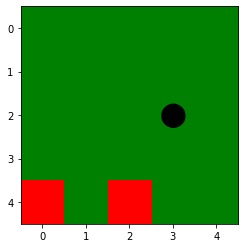

-----
step: 101
Robot's Current Position [2, 3]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action east


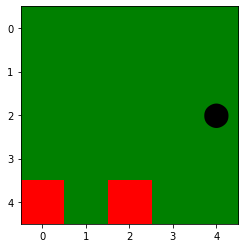

-----
step: 102
Robot's Current Position [2, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action north


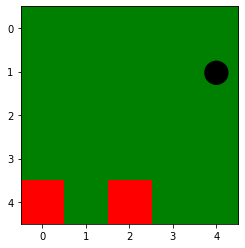

-----
step: 103
Robot's Current Position [1, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action north


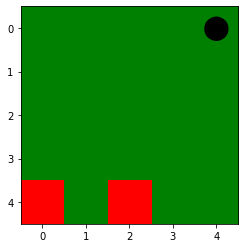

-----
step: 104
Robot's Current Position [0, 4]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action south


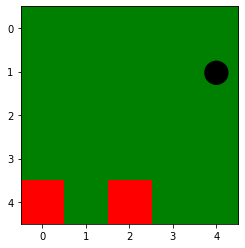

-----
step: 105
Robot's Current Position [1, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action south


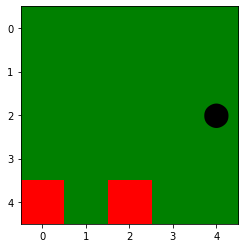

-----
step: 106
Robot's Current Position [2, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action west


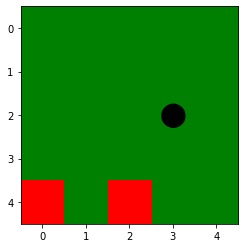

-----
step: 107
Robot's Current Position [2, 3]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action south


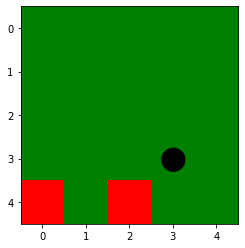

-----
step: 108
Robot's Current Position [3, 3]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action south


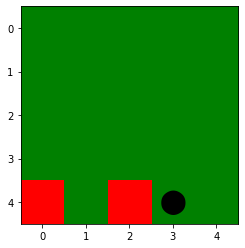

-----
step: 109
Robot's Current Position [4, 3]
Sensor/Bumper Information: {'north': False, 'south': True, 'west': False, 'east': False}
Is it Dirty?: False
Action west


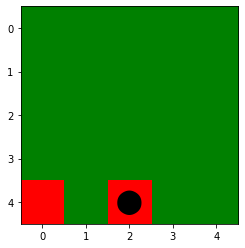

-----
step: 110
Robot's Current Position [4, 2]
Sensor/Bumper Information: {'north': False, 'south': True, 'west': False, 'east': False}
Is it Dirty?: True
Action suck


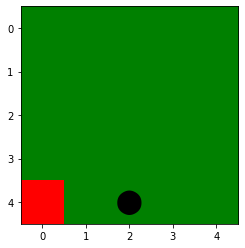

-----
step: 111
Robot's Current Position [4, 2]
Sensor/Bumper Information: {'north': False, 'south': True, 'west': False, 'east': False}
Is it Dirty?: False
Action west


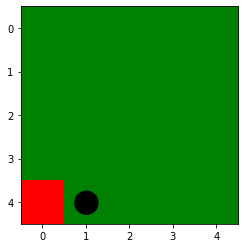

-----
step: 112
Robot's Current Position [4, 1]
Sensor/Bumper Information: {'north': False, 'south': True, 'west': False, 'east': False}
Is it Dirty?: False
Action west


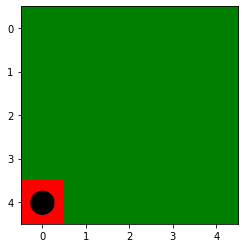

-----
step: 113
Robot's Current Position [4, 0]
Sensor/Bumper Information: {'north': False, 'south': True, 'west': True, 'east': False}
Is it Dirty?: True
Action suck


[4, 113]

In [8]:
vacuum_environment(simple_reflex_agent, n = 5, maxsteps = 10000, verbose = True)

## Task 3: Implement a model-based reflex agent [20 Points]

Model-based agents use a state to keep track of what they have done and perceived so far. Your agent needs to find out where it is located and then keep track of its current location. You also need a set of rules based on the state and the percepts to make sure that the agent will clean the whole room. For example, the agent can move to a corner to determine its location and then it can navigate through the whole room and clean dirty squares.

Describe how you define the __agent state__ and how your agent works before implementing it. ([Help with implementing state information on Python](https://github.com/mhahsler/CS7320-AI/blob/master/Python_Code_Examples/store_agent_state_information.ipynb))

In [9]:
# Your short description of the state and your implementation goes here

Environment with Dirt Location:
 [[False  True False False False]
 [False False False False False]
 [ True  True False False False]
 [False False False False  True]
 [False False  True False False]]
Total Dirty Squares: 5

Initialize simulation


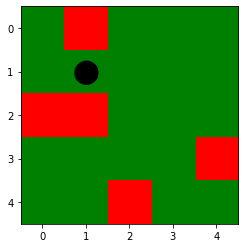

-----
step: 1
Robot's Current Position [1, 1]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action north


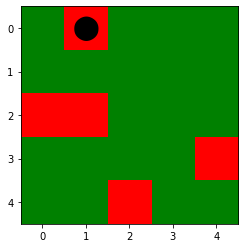

-----
step: 2
Robot's Current Position [0, 1]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: True
Action west


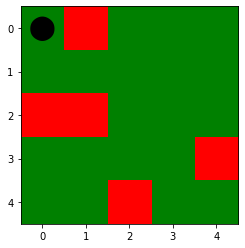

-----
step: 3
Robot's Current Position [0, 0]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action ['north', 'east', 'west', 'south', 'suck']


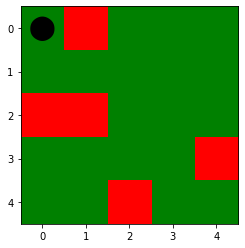

-----
step: 4
Robot's Current Position [0, 0]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action east


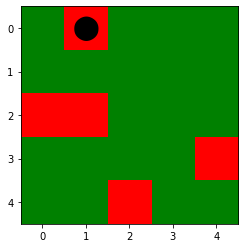

-----
step: 5
Robot's Current Position [0, 1]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: True
Action suck


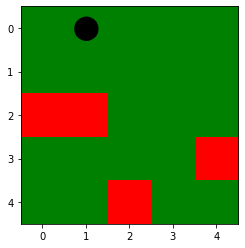

-----
step: 6
Robot's Current Position [0, 1]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action east


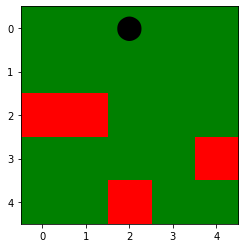

-----
step: 7
Robot's Current Position [0, 2]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action east


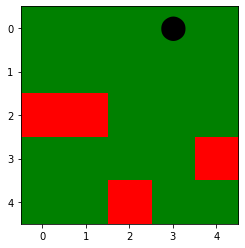

-----
step: 8
Robot's Current Position [0, 3]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action east


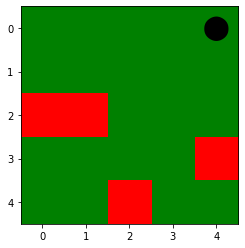

-----
step: 9
Robot's Current Position [0, 4]
Sensor/Bumper Information: {'north': True, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action south


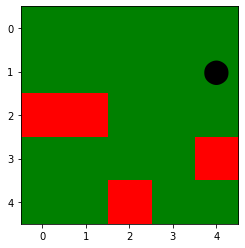

-----
step: 10
Robot's Current Position [1, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action west


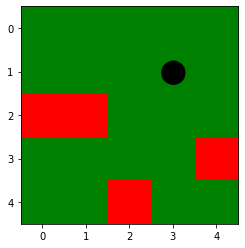

-----
step: 11
Robot's Current Position [1, 3]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action west


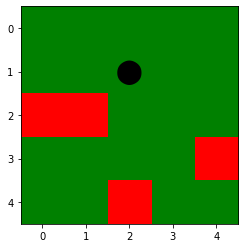

-----
step: 12
Robot's Current Position [1, 2]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action west


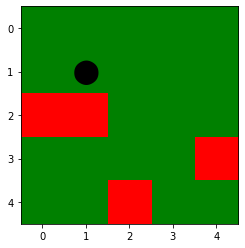

-----
step: 13
Robot's Current Position [1, 1]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action west


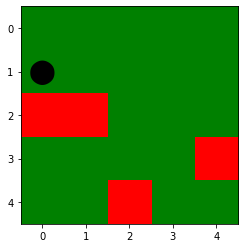

-----
step: 14
Robot's Current Position [1, 0]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action south


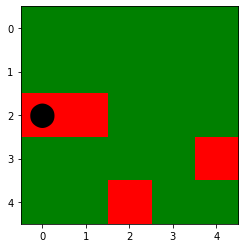

-----
step: 15
Robot's Current Position [2, 0]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': True, 'east': False}
Is it Dirty?: True
Action suck


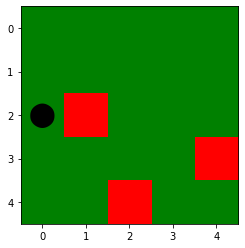

-----
step: 16
Robot's Current Position [2, 0]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action east


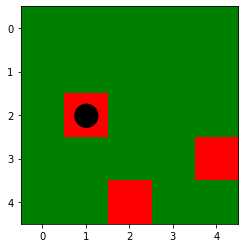

-----
step: 17
Robot's Current Position [2, 1]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: True
Action suck


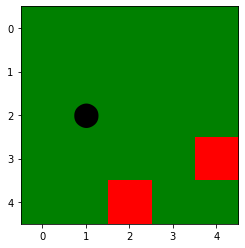

-----
step: 18
Robot's Current Position [2, 1]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action east


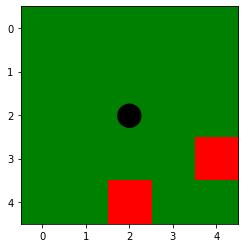

-----
step: 19
Robot's Current Position [2, 2]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action east


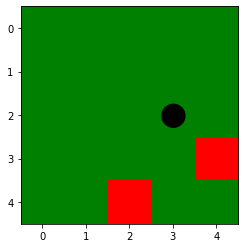

-----
step: 20
Robot's Current Position [2, 3]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action east


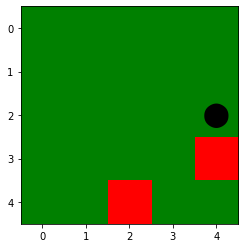

-----
step: 21
Robot's Current Position [2, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action south


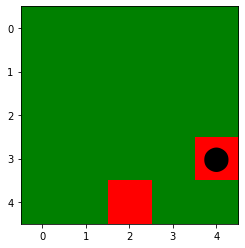

-----
step: 22
Robot's Current Position [3, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: True
Action suck


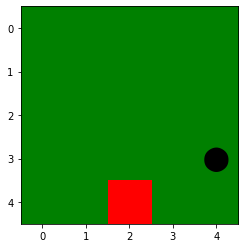

-----
step: 23
Robot's Current Position [3, 4]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': True}
Is it Dirty?: False
Action west


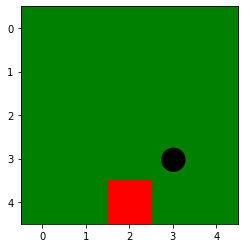

-----
step: 24
Robot's Current Position [3, 3]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action west


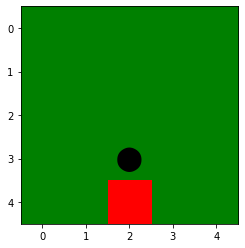

-----
step: 25
Robot's Current Position [3, 2]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action west


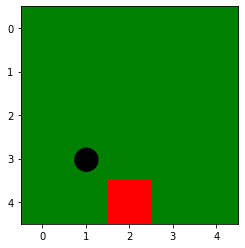

-----
step: 26
Robot's Current Position [3, 1]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': False, 'east': False}
Is it Dirty?: False
Action west


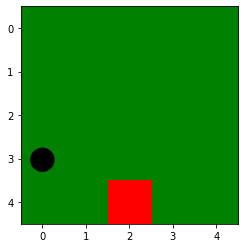

-----
step: 27
Robot's Current Position [3, 0]
Sensor/Bumper Information: {'north': False, 'south': False, 'west': True, 'east': False}
Is it Dirty?: False
Action south


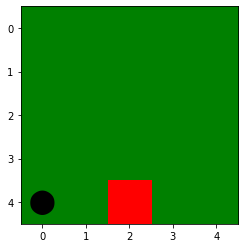

-----
step: 28
Robot's Current Position [4, 0]
Sensor/Bumper Information: {'north': False, 'south': True, 'west': True, 'east': False}
Is it Dirty?: False
Action east


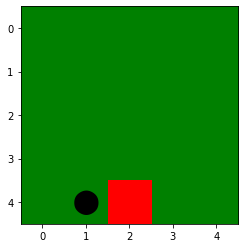

-----
step: 29
Robot's Current Position [4, 1]
Sensor/Bumper Information: {'north': False, 'south': True, 'west': False, 'east': False}
Is it Dirty?: False
Action east


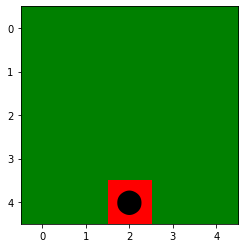

-----
step: 30
Robot's Current Position [4, 2]
Sensor/Bumper Information: {'north': False, 'south': True, 'west': False, 'east': False}
Is it Dirty?: True
Action suck


[5, 30]

In [10]:
# Your code goes here
class model_based_reflex_agent:

    def __init__(self, name = "An Agent"):

        self.name = name

        self.task = True

        self.removememory = []

        self.direction = "east"

 

    

    def actions(self, bumpers, dirty):

    #def actions(self, bumpers, dirty):

        #Bring the vacuum robot to start co-ordinatinates(i.e north-west corner)

        if self.task :

            if not bumpers["north"] :

                return "north"

 

            if not bumpers["west"] :

                return "west"

        

            self.task = False

            self.position = [0,0]

            

            return actions

            

        else :

            

            if dirty :

                self.removememory.append(self.position)

                return "suck"

            

            else :

                

                if not bumpers[self.direction] :

                    

                    if self.direction == "east":

                        self.position[1] = self.position[1] + 1

                    

                    else :

                        self.position[1] = self.position[1] - 1

                    return self.direction                

                

                

                else :

                    self.position[0] = self.position[0] + 1

                   

                    if self.direction == "east":

                        self.direction = "west"

                    

                    else:

                        self.direction = "east"

                    return "south"

                

mreflex = model_based_reflex_agent()

vacuum_environment(mreflex.actions, n = 5, maxsteps = 10000, verbose = True)

## Task 4: Simulation study [30 Points]

Compare the performance (the performance measure is defined in the PEAS description above) of the agents using  environments of different size. E.g., $5 \times 5$, $10 \times 10$ and
$100 \times 100$. Use 100 random runs for each. Present the results using tables and graphs. Discuss the differences between the agents. 
([Help with charts and tables in Python](https://github.com/mhahsler/CS7320-AI/blob/master/Python_Code_Examples/charts_and_tables.ipynb))

In [11]:
# Your code goes here
# Your code goes here
import matplotlib.pyplot as plt

# add a grid to the plots
import seaborn as sns 
sns.set(style="whitegrid")
from pylab import rcParams
rcParams['figure.figsize']=10,5

In [12]:
N = 100 
agent1_5 = np.repeat(0,N) 
agent2_5 = np.repeat(0,N) 
agent3_5 = np.repeat(0,N) 
agent1_10 = np.repeat(0,N) 
agent2_10 = np.repeat(0,N) 
agent3_10 = np.repeat(0,N) 
agent1_100= np.repeat(0,N)
agent2_100= np.repeat(0,N)
agent3_100= np.repeat(0,N)



In [13]:
# Calculating the energy expended to clean a dirty block in each run for 5x5 room for i in range(N):     
for i in range(N):
    
    mreflex = model_based_reflex_agent()    
# a15 contains [dirty, energy expended] pair     
    agent1_5[i]= vacuum_environment(simple_randomized_agent, n = 5, maxsteps = 1000, verbose = False)[1]



    agent2_5[i]= vacuum_environment(simple_reflex_agent, n = 5, maxsteps = 1000, verbose = False)[1]


    agent3_5[i]= vacuum_environment(mreflex.actions, n = 5, maxsteps = 1000, verbose = False)[1]



# Calculating the energy expended to clean a dirty block in each run for 10x10 room for i in range(N):  
for i in range(N):
    
    mreflex = model_based_reflex_agent()    
    agent1_10[i]= vacuum_environment(simple_randomized_agent, n = 10, maxsteps = 1000, verbose = False)[1]



    agent2_10[i]= vacuum_environment(simple_reflex_agent, n = 10, maxsteps = 1000, verbose = False)[1]
 

    agent3_10[i]= vacuum_environment(mreflex.actions, n = 10, maxsteps = 1000, verbose = False)[1]

# Calculating the energy expended to clean a dirty block in each run for 100x100 room for i in range(N):  
for i in range(N):
    mreflex = model_based_reflex_agent() 
    agent1_100[i]= vacuum_environment(simple_randomized_agent, n = 100, maxsteps = 100000, verbose = False)[1]



    agent2_100[i]= vacuum_environment(simple_reflex_agent, n = 100, maxsteps = 100000, verbose = False)[1]
 

    agent3_100[i]= vacuum_environment(mreflex.actions, n = 100, maxsteps = 100000, verbose = False)[1]



Fill out the following table with the average performance measure for 100 random runs (you may also create this table with code):

| Size     | Randomized Agent | Simple Reflex Agent | Model-based Reflex Agent |
|----------|------------------|---------------------|--------------------------|
| 5x5     | | | |
| 10x10   | | | |
| 100x100 | | | |

Add charts to compare the performance of the different agents.

In [14]:
# Your graphs and discussion of the results goes here
#Below table will display the average of the performance of the  3 agents for diffrent room size for 100 random runs
import numpy as np   
import pandas as pd 
print("Average value of 3 agents for different room sizes for 100 runs : ") 
data = np.array([['5x5', np.average(agent1_5), np.average(agent2_5), np.average(agent3_5)], ['10x10', np.average(agent1_10) ,np.average(agent2_10), np.average(agent3_10)], ['100x100', np.average(agent1_100), np.average(agent2_100), np.average(agent3_100)]])
df = pd.DataFrame(data, columns=["Size", "Randomized Agent", "Simple Reflex Agent", "Model-based Reflex Agent"])

df



Average value of 3 agents for different room sizes for 100 runs : 


,Size,Randomized Agent,Simple Reflex Agent,Model-based Reflex Agent
0,5x5,455.38,111.4,30.69
1,10x10,1000.0,758.59,124.68
2,100x100,100000.0,100000.0,12101.21


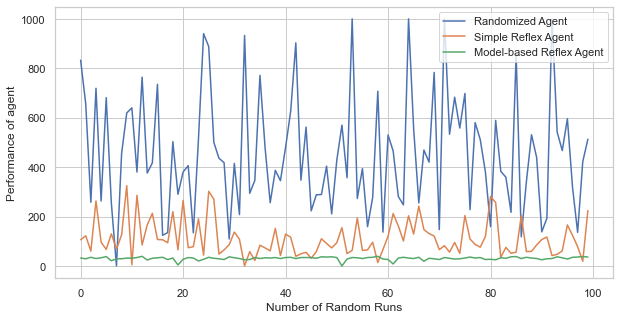

In [15]:
import matplotlib.pyplot as plt
from matplotlib import colors
rcParams['figure.figsize'] = 10, 5
x = range(N)
plt.plot(x, agent1_5, label = "Randomized Agent")
plt.plot(x, agent2_5, label = "Simple Reflex Agent")
plt.plot(x, agent3_5, label = "Model-based Reflex Agent")
plt.xlabel("Number of Random Runs")
plt.ylabel("Performance of agent")
plt.legend()
plt.show()

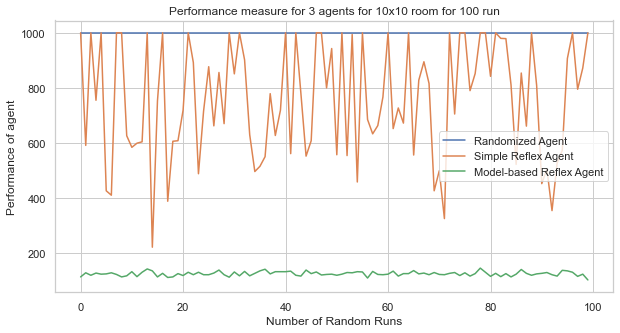

In [16]:
rcParams['figure.figsize'] = 10, 5
x = range(N)
plt.plot(x, agent1_10, label = "Randomized Agent")
plt.plot(x, agent2_10, label = "Simple Reflex Agent")
plt.plot(x, agent3_10, label = "Model-based Reflex Agent")
plt.title("Performance measure for 3 agents for 10x10 room for 100 run")
plt.xlabel("Number of Random Runs")
plt.ylabel("Performance of agent")
plt.legend()
plt.show()

## Task 5: Robustness of the agent implementations [10 Points] 

Describe how your agent implementations will perform 

* if it is put into a rectangular room with unknown size, 
* if the cleaning area can have an iregular shape (e.g., a hallway connecting two rooms), or 
* if the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors).

# Answer goes here
1. As, the room is infinite and if all squares are constantly dirty, the simple reflex agent can never clean the whole room as required in the PEAS description. Robot might be stuck, clean the same square multiple time and in the end, its energy might get drianed in room with unknown size. It does not have memory, so it will move through whole area. 
    Model based agent can move to a corner to determine its location and then it can navigate through the whole room and clean dirty squares. Model based agent stores what it has perceived so far, and store the memory that the area is clean and can operate on the rule of cleaning whole room.

2. Both i.e. simple reflex and model based reflex reacts to the bumper sensor by not bumping into the wall and to dirt with sucking. Simple reflect agent may clean same spot multiple time but reacts to wall and dirt. So both model will clean the hallway after room.

3. Both agent determine its location and then they can navigate through the whole room and clean dirty squares.if the room contains obstacles, they will move in different direction.

## Graduate student advanced task: Obstacles [10 Points]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 Bonus Points].

1. Change your simulation environment tor run experiments for the following problem: Add random obstacle squares that also trigger the bumper sensor. The agent does not know where the obstacles are. Observe how this changes the performance of the three implementations.

2. Describe what would need to be done to perform better with obstacles. Add code if you can. 

# Your code and discussion goes here
We can define various type of obstacles that robot might face and provide its locations in its memory. So it might not waste energy by sensing or moving in same location. This will trigger bumper sensor and robot will act in different direction. We can define obstacle of random size and shape for robot to identify better. We can also add algorithm to calculate shortest distance between robot position and obstacle to avoid energy drainage. 

## More advanced implementation tasks

* __Agent for and environment with obstacles:__ Implement an agent for an environment where the agent does not know how large the environment is (we assume it is rectangular), where it starts or where the obstacles are. An option would be to always move to the closest unchecked/uncleaned square (note that this is actualy depth-first search).

* __Utility-based agent:__ Change the environment for a $5 \times 5$ room, so each square has a fixed probability of getting dirty again. For the implementation, we give the environment a 2-dimensional array of probabilities. The utility of a state is defined as the number of currebntly clean squares in the room. Implement a utility-based agent that maximizes the expected utility over one full charge which lasts for 100000 time steps. To do this, the agent needs to learn the probabilities with which different squares get dirty again. This is very tricky!

In [13]:
# Your ideas/code